In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
import scipy.stats as stats
from scipy.stats import pointbiserialr

In [20]:
import researchpy as rp

In [21]:
import pingouin as pg

In [ ]:
%pip install pingouin

In [7]:
%pip install researchpy

Note: you may need to restart the kernel to use updated packages.


Reading Datasets

In [22]:
my_data =pd.read_csv(r"D:\其他文件\data-2022-12-6\MANG6513-Group-22-23.csv")

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:
my_data_2=pd.read_csv(r"D:\其他文件\data-2022-12-6\ICD 10 codes-Group Homework-22-23.csv",header=None)

In [24]:
my_data.head()

,Unnamed: 0,PROTOCOL.NUMBER,OPENING.MEDICAL.RECORD.DATE,ADMISSION.DATE,DISCHARGE.FORECAST,DISCHARGE.DATE,MEDICAL.RECORD,AGE,SEX,HOSPITALIZATION.TYPE,SERVICE,1ST.SURGERY.DATE,NUMBER.OF.SURGERIES,TRANSFER.PLACE,DOCTOR,ICD,REASON.FOR.DISCHARGE,COMORBIDITIES,DATE.OF.ACCIDENT,TIME.BETWEEN.INJURY.AND.HOSPITALIZATION
0,1,2726633,11/01/2000 00:00,13/10/2016 00:00,14/10/2016 16:29,18/10/2016 00:00,109093,66,F,SURGICAL,SPINE,14/10/2016 11:48,1,HOME,0,D48.0,MEDICAL DECISION,1,26/02/2000 00:00,NaN
1,2,3184332,12/11/2007 00:00,23/07/2018 00:00,29/07/2018 10:28,11/09/2018 00:00,212760,66,M,INFECTION / POSTOPERATIVE COMPLICATION I,HIP,24/07/2018 12:55,4,HOME,1,T84.0,MEDICAL DECISION,0,12/04/2000 00:00,NaN
2,3,3318750,07/05/2004 00:00,13/02/2019 00:00,17/02/2019 07:36,15/02/2019 00:00,150872,39,M,SURGICAL,ADULT TRAUMA,14/02/2019 12:20,1,HOME,2,M84.1,MEDICAL DECISION,0,26/09/2000 00:00,NaN
3,4,3320589,22/11/2018 00:00,14/02/2019 00:00,16/02/2019 17:04,16/02/2019 00:00,352661,26,M,SURGICAL,FEET,15/02/2019 16:05,1,HOME,3,M85.5,MEDICAL DECISION,0,14/02/2001 00:00,NaN
4,5,3353320,08/06/2001 00:00,02/04/2019 00:00,06/04/2019 08:25,04/04/2019 00:00,123491,58,M,SURGICAL,FEET,03/04/2019 08:45,1,HOME,4,T93.2,MEDICAL DECISION,1,14/05/2001 00:00,NaN


In [25]:
my_data_2.head()

,0,1,2,3,4,5
0,A00,0,A000,"Cholera due to Vibrio cholerae 01, biovar chol...","Cholera due to Vibrio cholerae 01, biovar chol...",Cholera
1,A00,1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor","Cholera due to Vibrio cholerae 01, biovar eltor",Cholera
2,A00,9,A009,"Cholera, unspecified","Cholera, unspecified",Cholera
3,A010,0,A0100,"Typhoid fever, unspecified","Typhoid fever, unspecified",Typhoid fever
4,A010,1,A0101,Typhoid meningitis,Typhoid meningitis,Typhoid fever


Cleaning Data

In [26]:
my_data.shape

(79485, 20)

In [27]:
for i in my_data.columns:
    print(i,":",my_data[i].nunique())

Unnamed: 0 : 79485
PROTOCOL.NUMBER : 79485
OPENING.MEDICAL.RECORD.DATE : 6009
ADMISSION.DATE : 3350
DISCHARGE.FORECAST : 71902
DISCHARGE.DATE : 3528
MEDICAL.RECORD : 51576
AGE : 102
SEX : 2
HOSPITALIZATION.TYPE : 20
SERVICE : 22
1ST.SURGERY.DATE : 61597
NUMBER.OF.SURGERIES : 26
TRANSFER.PLACE : 407
DOCTOR : 391
ICD : 1582
REASON.FOR.DISCHARGE : 14
COMORBIDITIES : 2
DATE.OF.ACCIDENT : 2555
TIME.BETWEEN.INJURY.AND.HOSPITALIZATION : 0


Column 'PROTOCOL.NUMBER' has 79485 unique values, hence all values are unique and can be deemed useless. Unnamed: 0
Therefore dropping the entire column 'PROTOCOL.NUMBER','Unnamed: 0'

In [28]:
my_data.drop(columns=['PROTOCOL.NUMBER','Unnamed: 0'],inplace=True)

In [29]:
my_data.describe()

,MEDICAL.RECORD,AGE,NUMBER.OF.SURGERIES,DOCTOR,COMORBIDITIES,TIME.BETWEEN.INJURY.AND.HOSPITALIZATION
count,79485.000000,79485.000000,79485.000000,79485.000000,79485.000000,0.0
mean,285922.272907,46.006668,0.964572,67.006114,0.506838,NaN
std,67418.483293,20.726877,0.779356,58.285382,0.499956,NaN
min,15.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,251950.000000,30.000000,1.000000,17.000000,0.000000,NaN
50%,305394.000000,49.000000,1.000000,55.000000,1.000000,NaN
75%,336267.000000,62.000000,1.000000,107.000000,1.000000,NaN
max,372428.000000,101.000000,52.000000,390.000000,1.000000,NaN


In [30]:
for i in my_data.columns:
    if my_data[i].dtype!='int64':
        print(my_data[i].describe().to_frame(),'\n')

       OPENING.MEDICAL.RECORD.DATE
count                        79485
unique                        6009
top               18/09/2012 00:00
freq                            76 

          ADMISSION.DATE
count              79485
unique              3350
top     18/11/2013 00:00
freq                  68 

       DISCHARGE.FORECAST
count               78927
unique              71902
top      28/10/2019 00:00
freq                   33 

          DISCHARGE.DATE
count              79426
unique              3528
top     20/12/2013 00:00
freq                  66 

          SEX
count   79485
unique      2
top        M 
freq    41028 

       HOSPITALIZATION.TYPE
count                 53447
unique                   20
top                SURGICAL
freq                  32937 

       SERVICE
count    79485
unique      22
top       HAND
freq     12531 

        1ST.SURGERY.DATE
count              69559
unique             61597
top     30/12/2015 08:30
freq                   7 

                   

Cleaning null values in Discharge Date column

In [31]:
my_data.dropna(subset=['DISCHARGE.DATE'],inplace=True)

In [32]:
my_data['DISCHARGE.DATE']

0        18/10/2016 00:00
1        11/09/2018 00:00
2        15/02/2019 00:00
3        16/02/2019 00:00
4        04/04/2019 00:00
               ...       
79480    01/09/2021 00:00
79481    02/09/2021 00:00
79482    04/09/2021 00:00
79483    04/09/2021 00:00
79484    02/09/2021 00:00
Name: DISCHARGE.DATE, Length: 79426, dtype: object

Calculating Length of Stay of Patients

In [33]:
my_data['Len_Of_Stay'] = (pd.to_datetime(my_data['DISCHARGE.DATE'],format="%d/%m/%Y %H:%M")-
                                    pd.to_datetime(my_data['ADMISSION.DATE'],format="%d/%m/%Y %H:%M")).dt.days

In [34]:
my_data['Len_Of_Stay'].describe()

count    79426.000000
mean         7.772971
std         18.564809
min          0.000000
25%          2.000000
50%          3.000000
75%          6.000000
max       1215.000000
Name: Len_Of_Stay, dtype: float64

Time until 1st surgery

In [35]:
my_data['Days_between_admission_and_1st_surgery'] = (pd.to_datetime(my_data[~my_data['1ST.SURGERY.DATE'].isnull()]['1ST.SURGERY.DATE'],format="%d/%m/%Y %H:%M")-
                                    (pd.to_datetime(my_data[~my_data['ADMISSION.DATE'].isnull()]['ADMISSION.DATE'],format="%d/%m/%Y %H:%M").dt.normalize())).dt.days

##### Difference of actual discharge and forecasted discharge

In [36]:
my_data['Days_between_actual_discharge_and_forecasted'] = (pd.to_datetime(my_data[~my_data['DISCHARGE.DATE'].isnull()]['DISCHARGE.DATE'],format="%d/%m/%Y %H:%M")-
                                    (pd.to_datetime(my_data[~my_data['DISCHARGE.FORECAST'].isnull()]['DISCHARGE.FORECAST'],format="%d/%m/%Y %H:%M").dt.normalize())).dt.days

In [37]:
my_data.head()

,OPENING.MEDICAL.RECORD.DATE,ADMISSION.DATE,DISCHARGE.FORECAST,DISCHARGE.DATE,MEDICAL.RECORD,AGE,SEX,HOSPITALIZATION.TYPE,SERVICE,1ST.SURGERY.DATE,...,TRANSFER.PLACE,DOCTOR,ICD,REASON.FOR.DISCHARGE,COMORBIDITIES,DATE.OF.ACCIDENT,TIME.BETWEEN.INJURY.AND.HOSPITALIZATION,Len_Of_Stay,Days_between_admission_and_1st_surgery,Days_between_actual_discharge_and_forecasted
0,11/01/2000 00:00,13/10/2016 00:00,14/10/2016 16:29,18/10/2016 00:00,109093,66,F,SURGICAL,SPINE,14/10/2016 11:48,...,HOME,0,D48.0,MEDICAL DECISION,1,26/02/2000 00:00,NaN,5,1.0,4.0
1,12/11/2007 00:00,23/07/2018 00:00,29/07/2018 10:28,11/09/2018 00:00,212760,66,M,INFECTION / POSTOPERATIVE COMPLICATION I,HIP,24/07/2018 12:55,...,HOME,1,T84.0,MEDICAL DECISION,0,12/04/2000 00:00,NaN,50,1.0,44.0
2,07/05/2004 00:00,13/02/2019 00:00,17/02/2019 07:36,15/02/2019 00:00,150872,39,M,SURGICAL,ADULT TRAUMA,14/02/2019 12:20,...,HOME,2,M84.1,MEDICAL DECISION,0,26/09/2000 00:00,NaN,2,1.0,-2.0
3,22/11/2018 00:00,14/02/2019 00:00,16/02/2019 17:04,16/02/2019 00:00,352661,26,M,SURGICAL,FEET,15/02/2019 16:05,...,HOME,3,M85.5,MEDICAL DECISION,0,14/02/2001 00:00,NaN,2,1.0,0.0
4,08/06/2001 00:00,02/04/2019 00:00,06/04/2019 08:25,04/04/2019 00:00,123491,58,M,SURGICAL,FEET,03/04/2019 08:45,...,HOME,4,T93.2,MEDICAL DECISION,1,14/05/2001 00:00,NaN,2,1.0,-2.0


In [38]:
my_data_copy = my_data.copy()

#Encoding sex with Female=0 and Male=1

In [39]:
tmp = pd.get_dummies(my_data_copy['SEX'])

In [40]:
my_data_copy=pd.concat([my_data_copy,tmp],axis=1)

In [41]:
my_data.drop(columns=['OPENING.MEDICAL.RECORD.DATE'],inplace=True)

#Removing outliers

In [42]:
my_df=my_data_copy.copy()

In [43]:
for i in my_data_copy['SERVICE'].unique():
    a=my_data_copy[my_data_copy['SERVICE']==i]
    #Q1 = np.percentile(a[~a['No_Of_Days_In_Hosp'].isnull()]['No_Of_Days_In_Hosp'], 25)
    th = np.percentile(a[~a['Len_Of_Stay'].isnull()]['Len_Of_Stay'], 99.5)
    #IQR = Q3 - Q1
    #upper = Q3 +1.5*IQR
    #lower = Q1-1.5*IQR
    #print(i,Q3)
    for index, row in my_df[~my_df['Len_Of_Stay'].isnull()].iterrows():
        if row['Len_Of_Stay']>=th and row['SERVICE']==i:
            my_df.drop(index, inplace=True)

In [44]:
for i in my_data_copy['SERVICE'].unique():
    a=my_data_copy[my_data_copy['SERVICE']==i]
    th = np.percentile(a['NUMBER.OF.SURGERIES'], 99.95)
    
    #print(i,Q3)
    for index, row in my_df.iterrows():
        if row['NUMBER.OF.SURGERIES']>=th and row['SERVICE']==i:
            my_df.drop(index, inplace=True)

In [45]:
my_df.shape

(78542, 23)

In [46]:
for i in my_data_copy['SERVICE'].unique():
    a=my_data_copy[my_data_copy['SERVICE']==i]
    th = np.percentile(a['Len_Of_Stay'], 99.5)
    print(i,th)

SPINE 183.550000000002
HIP 160.09000000000015
ADULT TRAUMA 147.0
FEET 49.51000000000022
SHOULDER 48.0
ELDERLY TRAUMA 213.47999999999956
SKULL-MAXILLO-FACIAL 37.97999999999956
PEDIATRIC 54.0
KNEE 92.0
MICROSURGERY 98.05000000000041
ONCOLOGY 76.20000000000073
LIMB LENGTHENING 108.52500000000009
HAND 26.350000000000364
INTERNAL MEDICINE 295.5499999999997
TRAUMA 79.20000000000006
SPORT TRAUMA 7.420000000000016
THORACIC DEFORMITY 13.6
GENERAL SURGERY 1.99
GENERAL PRACTICE 2.0
INACTIVE - SPORTS MEDICINE 2.0
TISSUE BANK 16.599999999999852
PAIN CLINIC 8.95


In [47]:
for i in my_data_copy['SERVICE'].unique():
    a=my_data_copy[my_data_copy['SERVICE']==i]
    #Q1 = np.percentile(a[~a['No_Of_Days_In_Hosp'].isnull()]['No_Of_Days_In_Hosp'], 25)
    th = np.percentile(a['NUMBER.OF.SURGERIES'], 99.95)
    print(i,th)

SPINE 20.431000000000495
HIP 13.0
ADULT TRAUMA 19.0
FEET 5.751000000000204
SHOULDER 4.0
ELDERLY TRAUMA 14.393500000000131
SKULL-MAXILLO-FACIAL 14.219500000002881
PEDIATRIC 6.762499999999818
KNEE 12.0
MICROSURGERY 7.041000000000167
ONCOLOGY 10.210000000000036
LIMB LENGTHENING 10.61050000000023
HAND 7.0
INTERNAL MEDICINE 4.531000000000063
TRAUMA 2.9740000000000038
SPORT TRAUMA 1.90300000000002
THORACIC DEFORMITY 1.0
GENERAL SURGERY 0.9995
GENERAL PRACTICE 0.0
INACTIVE - SPORTS MEDICINE 1.0
TISSUE BANK 0.0
PAIN CLINIC 0.0


#Checking skewness

In [48]:
print('This distribution has skew', my_df.skew())
print('This distribution has kurtosis', my_df.kurt())

This distribution has skew MEDICAL.RECORD                                 -1.168870
AGE                                            -0.267008
NUMBER.OF.SURGERIES                             6.034287
DOCTOR                                          0.979038
COMORBIDITIES                                  -0.039427
TIME.BETWEEN.INJURY.AND.HOSPITALIZATION              NaN
Len_Of_Stay                                     5.195563
Days_between_admission_and_1st_surgery          6.762969
Days_between_actual_discharge_and_forecasted    5.249972
F                                               0.060991
M                                              -0.060991
dtype: float64
This distribution has kurtosis MEDICAL.RECORD                                   0.888625
AGE                                             -0.726085
NUMBER.OF.SURGERIES                             93.767665
DOCTOR                                           1.238004
COMORBIDITIES                                   -1.998496
TIME.BETWE

C:\Users\31125\AppData\Local\Temp/ipykernel_43896/2049906378.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('This distribution has skew', my_df.skew())
C:\Users\31125\AppData\Local\Temp/ipykernel_43896/2049906378.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('This distribution has kurtosis', my_df.kurt())


In [49]:
print('This distribution has skew', my_data_copy.skew())
print('This distribution has kurtosis', my_data_copy.kurt())

This distribution has skew MEDICAL.RECORD                                  -1.171661
AGE                                             -0.269207
NUMBER.OF.SURGERIES                             12.637158
DOCTOR                                           1.136825
COMORBIDITIES                                   -0.026946
TIME.BETWEEN.INJURY.AND.HOSPITALIZATION               NaN
Len_Of_Stay                                     12.560749
Days_between_admission_and_1st_surgery          10.185251
Days_between_actual_discharge_and_forecasted    13.671829
F                                                0.064749
M                                               -0.064749
dtype: float64
This distribution has kurtosis MEDICAL.RECORD                                    0.891469
AGE                                              -0.725066
NUMBER.OF.SURGERIES                             365.449147
DOCTOR                                            1.810382
COMORBIDITIES                                    -1.9

C:\Users\31125\AppData\Local\Temp/ipykernel_43896/3833905322.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('This distribution has skew', my_data_copy.skew())
C:\Users\31125\AppData\Local\Temp/ipykernel_43896/3833905322.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('This distribution has kurtosis', my_data_copy.kurt())


#Q1

In [50]:
my_df.groupby(['SERVICE'])['Len_Of_Stay'].describe()

,count,mean,std,min,25%,50%,75%,max
SERVICE,,,,,,,,
ADULT TRAUMA,7545.0,13.081246,18.735034,0.0,3.00,7.0,13.0,146.0
ELDERLY TRAUMA,3196.0,18.311640,24.280582,0.0,5.75,10.0,20.0,206.0
FEET,8454.0,3.407499,5.124536,0.0,2.00,2.0,3.0,49.0
GENERAL SURGERY,1.0,0.000000,NaN,0.0,0.00,0.0,0.0,0.0
HAND,12468.0,1.623035,1.795386,0.0,1.00,1.0,2.0,26.0
HIP,8647.0,13.287845,20.565469,0.0,4.00,6.0,12.0,159.0
INTERNAL MEDICINE,466.0,15.373391,24.138802,0.0,3.00,7.0,17.0,204.0
KNEE,12297.0,6.562739,9.573466,0.0,2.00,4.0,7.0,91.0
LIMB LENGTHENING,2766.0,6.612437,12.083024,0.0,2.00,2.0,5.0,108.0


<AxesSubplot:xlabel='SERVICE', ylabel='Len_Of_Stay'>

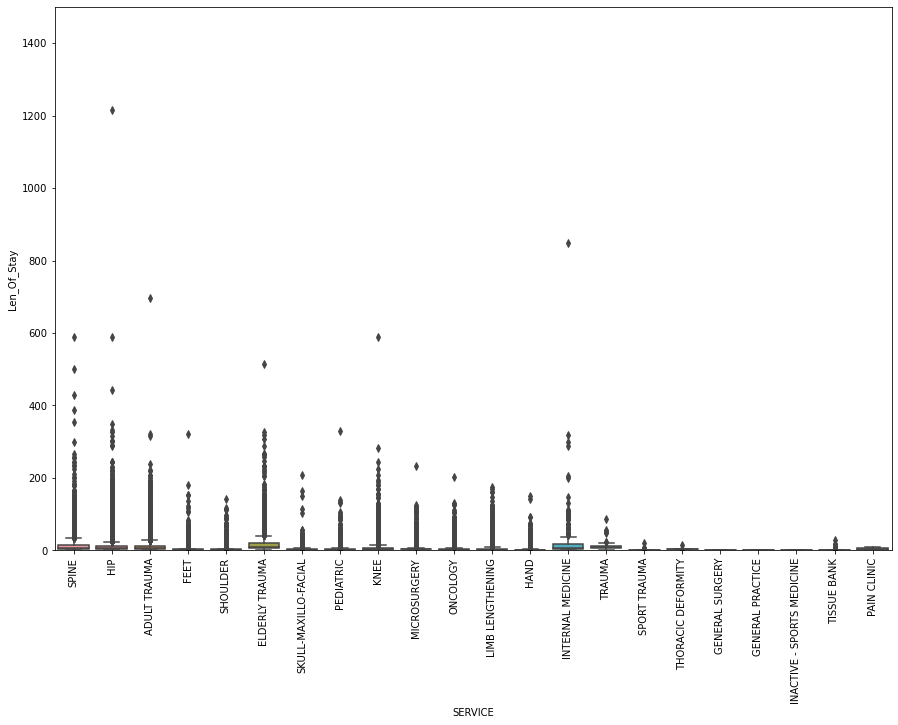

In [51]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
plt.ylim(0, 1500)
sns.boxplot( x=my_data['SERVICE'],y=my_data["Len_Of_Stay"] )

<AxesSubplot:xlabel='Len_Of_Stay', ylabel='SERVICE'>

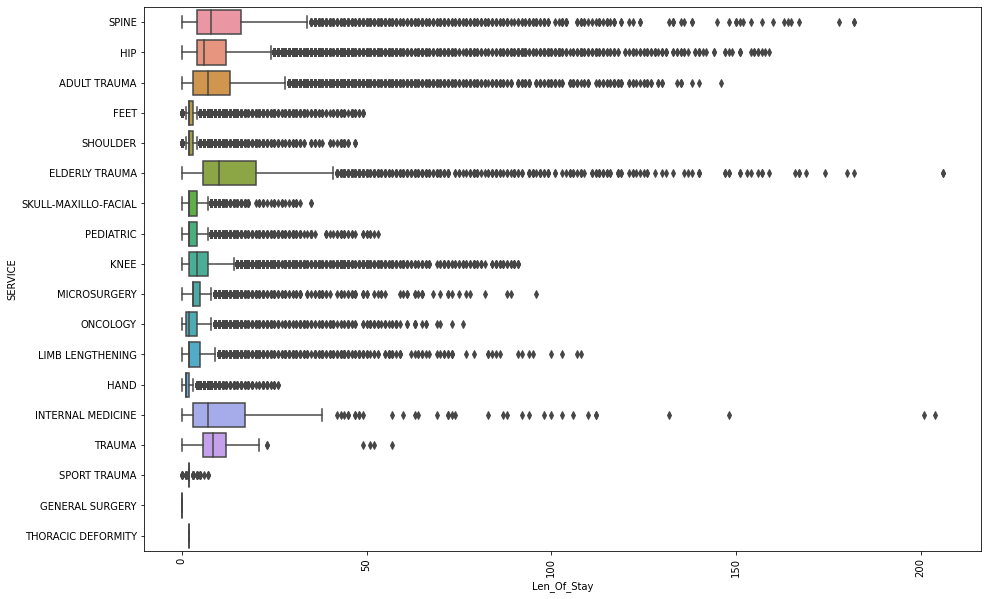

In [52]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
plt.ylim(0, 250)
sns.boxplot( x=my_df['Len_Of_Stay'],y=my_df["SERVICE"] )

In [53]:
my_data.groupby(['SERVICE'])['Len_Of_Stay'].mean().to_frame().reset_index().sort_values(by=['Len_Of_Stay'],ascending=False)

,SERVICE,Len_Of_Stay
1,ELDERLY TRAUMA,19.711574
8,INTERNAL MEDICINE,18.972340
17,SPINE,17.223249
6,HIP,14.536815
0,ADULT TRAUMA,14.019908
21,TRAUMA,13.528302
10,LIMB LENGTHENING,7.263309
9,KNEE,7.195550
11,MICROSURGERY,7.052632
12,ONCOLOGY,5.072013


#ANOVA

In [54]:
aov = pg.anova(data = my_data, dv ='Len_Of_Stay', between='SERVICE', detailed = True)

In [55]:
aov

,Source,SS,DF,MS,F,p-unc,np2
0,SERVICE,2.367618e+06,21,112743.714401,358.000768,0.0,0.086492
1,Within,2.500638e+07,79404,314.925901,NaN,NaN,NaN


<AxesSubplot:xlabel='SERVICE', ylabel='Len_Of_Stay'>

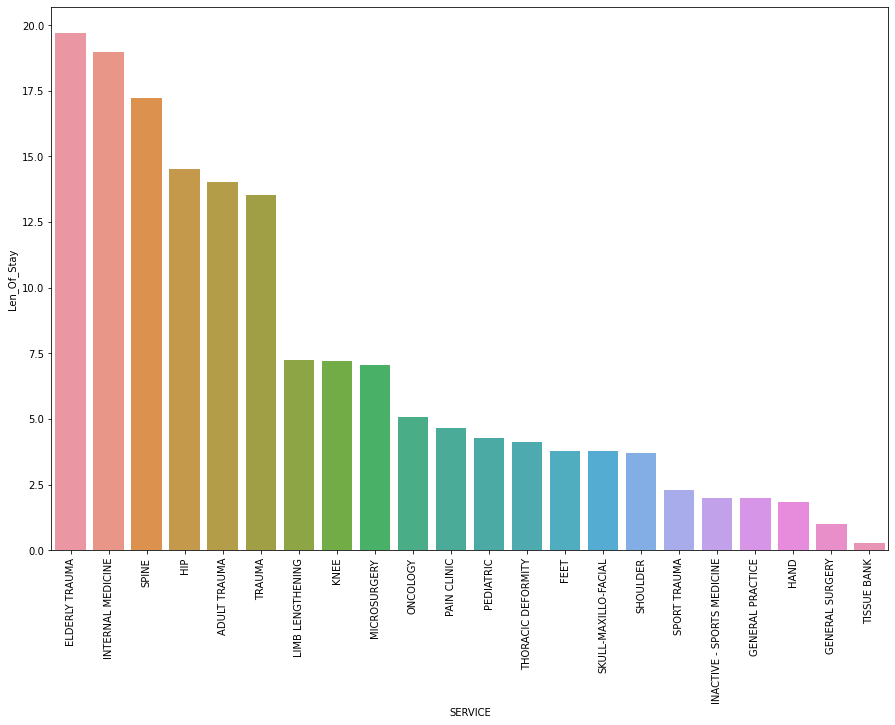

In [56]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
sns.barplot(x = 'SERVICE',
            y='Len_Of_Stay',
            data = my_data.groupby(['SERVICE'])['Len_Of_Stay'].mean().to_frame().reset_index().sort_values(by=['Len_Of_Stay'],ascending=False),
           ci=0)

#Regression

In [57]:
my_reg = my_df.copy()

In [58]:
my_reg['Len_Of_Stay'].fillna(0,inplace=True)

In [59]:
my_reg['Days_between_admission_and_1st_surgery'].fillna(0,inplace=True)

In [60]:
# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = [ 'NUMBER.OF.SURGERIES','AGE','Days_between_admission_and_1st_surgery']
X = my_reg[predictors]
y = my_reg['Len_Of_Stay']

In [61]:
model = sm.OLS(y, X).fit()

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Len_Of_Stay   R-squared (uncentered):                   0.493
Model:                            OLS   Adj. R-squared (uncentered):              0.493
Method:                 Least Squares   F-statistic:                          2.545e+04
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                        0.00
Time:                        09:24:50   Log-Likelihood:                     -2.9999e+05
No. Observations:               78542   AIC:                                  6.000e+05
Df Residuals:                   78539   BIC:                                  6.000e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
NUMBER.OF.SURGERIES                        7.1453      0.059    120.285      0.000       7.029       7.262
AGE                                       -0.0408      0.001    -32.255      0.000      -0.043      -0.038
Days_between_admission_and_1st_surgery     1.5647      0.012    130.588      0.000       1.541       1.588
==============================================================================
Omnibus:                    81645.052   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5594422.577
Skew:                           5.259   Prob(JB):                         0.00
Kurtosis:                      42.986   Cond. No.                         76.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Correlation

In [63]:
my_df.corr()['Len_Of_Stay']

MEDICAL.RECORD                                 -0.034748
AGE                                             0.113848
NUMBER.OF.SURGERIES                             0.487560
DOCTOR                                         -0.064272
COMORBIDITIES                                   0.015499
TIME.BETWEEN.INJURY.AND.HOSPITALIZATION              NaN
Len_Of_Stay                                     1.000000
Days_between_admission_and_1st_surgery          0.502000
Days_between_actual_discharge_and_forecasted    0.924105
F                                              -0.025589
M                                               0.025589
Name: Len_Of_Stay, dtype: float64

#Q2

#Correlation and heatmap for each service

In [64]:
my_df.drop(columns=['TIME.BETWEEN.INJURY.AND.HOSPITALIZATION'],inplace=True)

In [65]:
my_df['SERVICE'].unique()

array(['SPINE', 'HIP', 'ADULT TRAUMA', 'FEET', 'SHOULDER',
       'ELDERLY TRAUMA', 'SKULL-MAXILLO-FACIAL', 'PEDIATRIC', 'KNEE',
       'MICROSURGERY', 'ONCOLOGY', 'LIMB LENGTHENING', 'HAND',
       'INTERNAL MEDICINE', 'TRAUMA', 'SPORT TRAUMA', 'GENERAL SURGERY',
       'THORACIC DEFORMITY'], dtype=object)

In [66]:
my_df.corr()

,MEDICAL.RECORD,AGE,NUMBER.OF.SURGERIES,DOCTOR,COMORBIDITIES,Len_Of_Stay,Days_between_admission_and_1st_surgery,Days_between_actual_discharge_and_forecasted,F,M
MEDICAL.RECORD,1.000000,-0.184699,0.030358,0.141740,-0.175456,-0.034748,0.027325,-0.020300,-0.103375,0.103375
AGE,-0.184699,1.000000,0.000062,-0.136854,0.414730,0.113848,0.106274,0.084770,0.234747,-0.234747
NUMBER.OF.SURGERIES,0.030358,0.000062,1.000000,-0.046692,-0.023679,0.487560,0.121593,0.474472,-0.024135,0.024135
DOCTOR,0.141740,-0.136854,-0.046692,1.000000,-0.055835,-0.064272,-0.048824,-0.066934,0.007480,-0.007480
COMORBIDITIES,-0.175456,0.414730,-0.023679,-0.055835,1.000000,0.015499,0.006183,0.001259,0.213519,-0.213519
Len_Of_Stay,-0.034748,0.113848,0.487560,-0.064272,0.015499,1.000000,0.502000,0.924105,-0.025589,0.025589
Days_between_admission_and_1st_surgery,0.027325,0.106274,0.121593,-0.048824,0.006183,0.502000,1.000000,0.452953,-0.023868,0.023868
Days_between_actual_discharge_and_forecasted,-0.020300,0.084770,0.474472,-0.066934,0.001259,0.924105,0.452953,1.000000,-0.029485,0.029485
F,-0.103375,0.234747,-0.024135,0.007480,0.213519,-0.025589,-0.023868,-0.029485,1.000000,-1.000000
M,0.103375,-0.234747,0.024135,-0.007480,-0.213519,0.025589,0.023868,0.029485,-1.000000,1.000000


SPINE
AGE                                      -0.062393
NUMBER.OF.SURGERIES                       0.628444
COMORBIDITIES                            -0.053878
Len_Of_Stay                               1.000000
Days_between_admission_and_1st_surgery    0.414667
Name: Len_Of_Stay, dtype: float64


C:\Users\31125\AppData\Local\Temp/ipykernel_43896/312255541.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ax=sns.heatmap(a.corr().iloc[[1,2,5,6]]['Len_Of_Stay'][:, np.newaxis],cmap="Greens",annot=True,yticklabels=['AGE','NUMBER OF SURGERIES','Len_Of_Stay','Time until 1st surgery'],xticklabels=['Len_Of_Stay'])


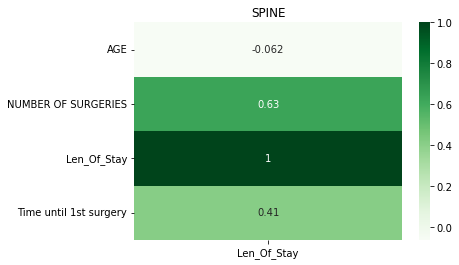



HIP
AGE                                       0.125253
NUMBER.OF.SURGERIES                       0.459111
COMORBIDITIES                            -0.013288
Len_Of_Stay                               1.000000
Days_between_admission_and_1st_surgery    0.454659
Name: Len_Of_Stay, dtype: float64


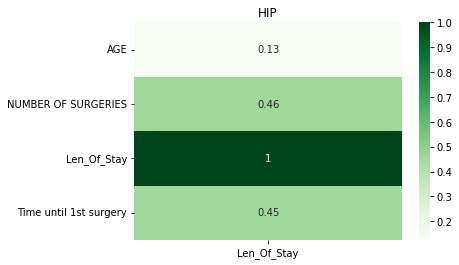



ADULT TRAUMA
AGE                                       0.013949
NUMBER.OF.SURGERIES                       0.651490
COMORBIDITIES                            -0.002478
Len_Of_Stay                               1.000000
Days_between_admission_and_1st_surgery    0.322668
Name: Len_Of_Stay, dtype: float64


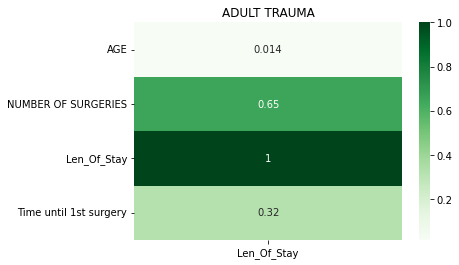



FEET
AGE                                       0.003658
NUMBER.OF.SURGERIES                       0.255874
COMORBIDITIES                             0.039344
Len_Of_Stay                               1.000000
Days_between_admission_and_1st_surgery    0.571334
Name: Len_Of_Stay, dtype: float64


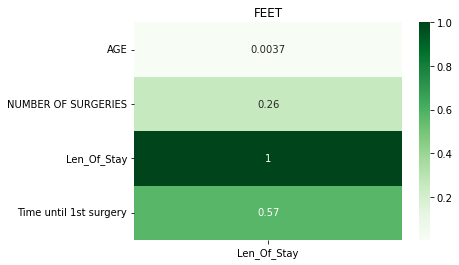



SHOULDER
AGE                                       0.097733
NUMBER.OF.SURGERIES                       0.183105
COMORBIDITIES                             0.016363
Len_Of_Stay                               1.000000
Days_between_admission_and_1st_surgery    0.561170
Name: Len_Of_Stay, dtype: float64


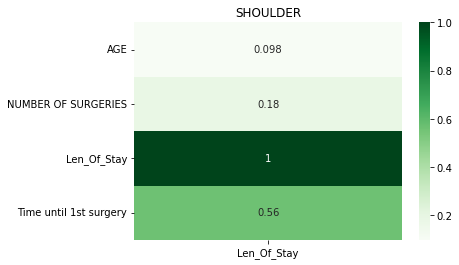



ELDERLY TRAUMA
AGE                                       0.114261
NUMBER.OF.SURGERIES                       0.576809
COMORBIDITIES                             0.012629
Len_Of_Stay                               1.000000
Days_between_admission_and_1st_surgery    0.384051
Name: Len_Of_Stay, dtype: float64


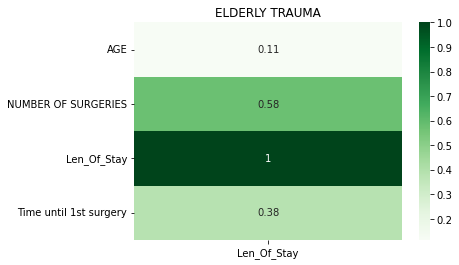



SKULL-MAXILLO-FACIAL
AGE                                       0.090767
NUMBER.OF.SURGERIES                       0.248373
COMORBIDITIES                             0.001835
Len_Of_Stay                               1.000000
Days_between_admission_and_1st_surgery    0.652646
Name: Len_Of_Stay, dtype: float64


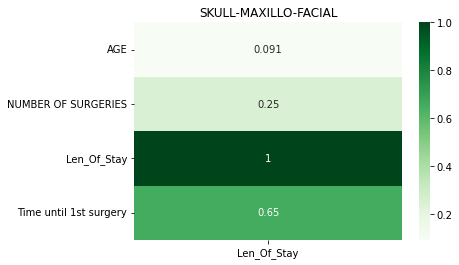



PEDIATRIC
AGE                                       0.092526
NUMBER.OF.SURGERIES                       0.215694
COMORBIDITIES                             0.019599
Len_Of_Stay                               1.000000
Days_between_admission_and_1st_surgery    0.587601
Name: Len_Of_Stay, dtype: float64


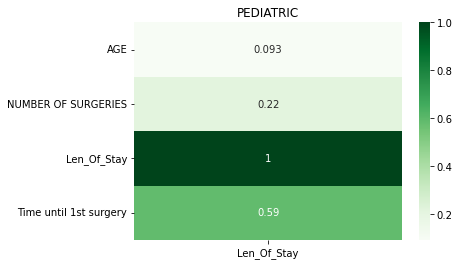



KNEE
AGE                                       0.218215
NUMBER.OF.SURGERIES                       0.453102
COMORBIDITIES                             0.094406
Len_Of_Stay                               1.000000
Days_between_admission_and_1st_surgery    0.446188
Name: Len_Of_Stay, dtype: float64


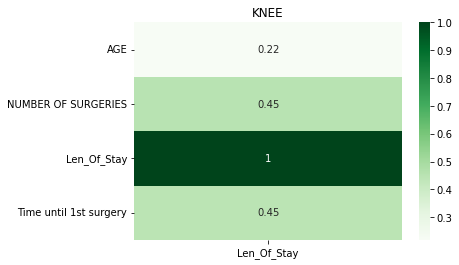



MICROSURGERY
AGE                                       0.193159
NUMBER.OF.SURGERIES                       0.627317
COMORBIDITIES                            -0.003544
Len_Of_Stay                               1.000000
Days_between_admission_and_1st_surgery    0.512114
Name: Len_Of_Stay, dtype: float64


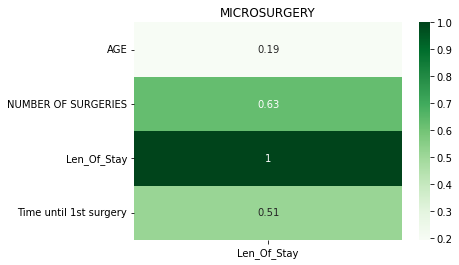



ONCOLOGY
AGE                                       0.103022
NUMBER.OF.SURGERIES                       0.329696
COMORBIDITIES                             0.026682
Len_Of_Stay                               1.000000
Days_between_admission_and_1st_surgery    0.577771
Name: Len_Of_Stay, dtype: float64


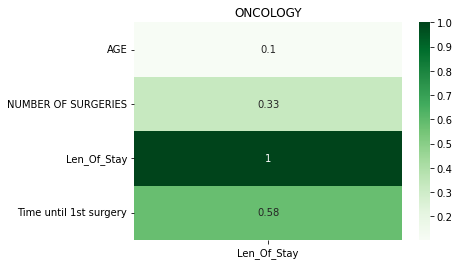



LIMB LENGTHENING
AGE                                       0.038333
NUMBER.OF.SURGERIES                       0.505259
COMORBIDITIES                             0.008071
Len_Of_Stay                               1.000000
Days_between_admission_and_1st_surgery    0.472159
Name: Len_Of_Stay, dtype: float64


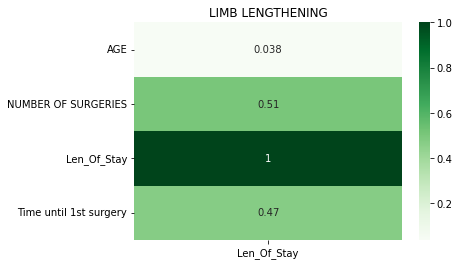



HAND
AGE                                      -0.160333
NUMBER.OF.SURGERIES                       0.156494
COMORBIDITIES                            -0.098521
Len_Of_Stay                               1.000000
Days_between_admission_and_1st_surgery    0.595281
Name: Len_Of_Stay, dtype: float64


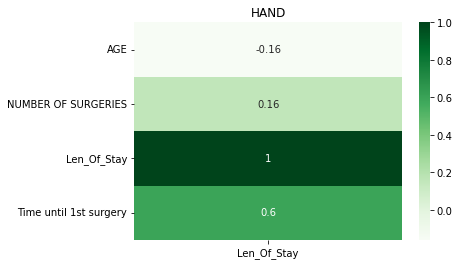



INTERNAL MEDICINE
AGE                                       0.229411
NUMBER.OF.SURGERIES                       0.264829
COMORBIDITIES                            -0.020356
Len_Of_Stay                               1.000000
Days_between_admission_and_1st_surgery    0.510214
Name: Len_Of_Stay, dtype: float64


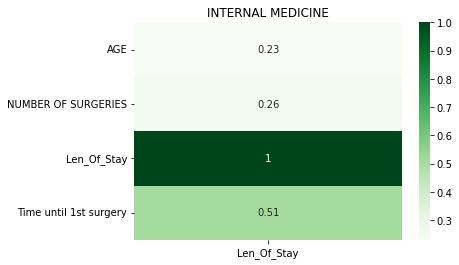



TRAUMA
AGE                                       0.192954
NUMBER.OF.SURGERIES                       0.617642
COMORBIDITIES                            -0.049116
Len_Of_Stay                               1.000000
Days_between_admission_and_1st_surgery    0.357110
Name: Len_Of_Stay, dtype: float64


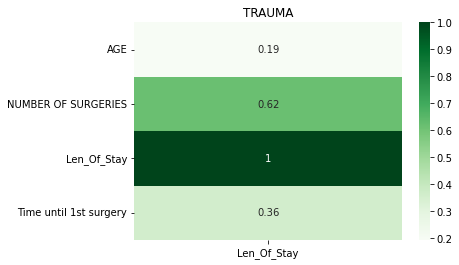



SPORT TRAUMA
AGE                                      -0.042527
NUMBER.OF.SURGERIES                       0.302082
COMORBIDITIES                            -0.002171
Len_Of_Stay                               1.000000
Days_between_admission_and_1st_surgery    0.789190
Name: Len_Of_Stay, dtype: float64


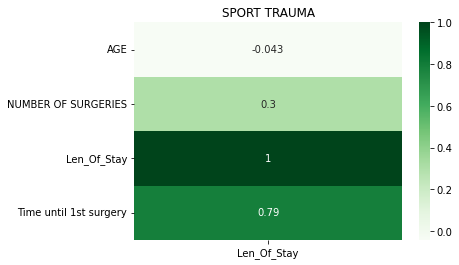

In [67]:
tem=pd.DataFrame()
for i in my_df['SERVICE'].unique():
    if i!='GENERAL SURGERY' and i!='THORACIC DEFORMITY':
        a=my_df[my_df['SERVICE']==i]
        print(i)  
        print(a.corr()['Len_Of_Stay'].iloc[[1,2,4,5,6]])
        corr=a.corr().iloc[[1,2,5,6]][['AGE','NUMBER.OF.SURGERIES','Len_Of_Stay','Days_between_admission_and_1st_surgery']]
        #plt.figure(figsize = (10,10))
        ax=sns.heatmap(a.corr().iloc[[1,2,5,6]]['Len_Of_Stay'][:, np.newaxis],cmap="Greens",annot=True,yticklabels=['AGE','NUMBER OF SURGERIES','Len_Of_Stay','Time until 1st surgery'],xticklabels=['Len_Of_Stay'])
        ax.set_title(i)
        #plt.savefig(i+'.jpg')
        plt.show()
        print('\n')
        corr['ser']=i
        tem=tem.append(corr)

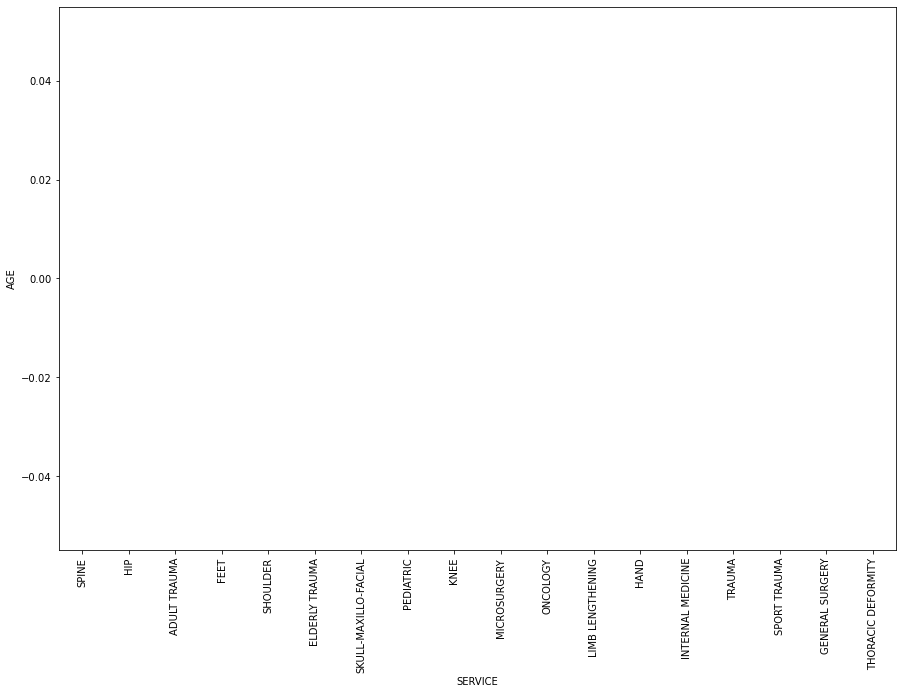

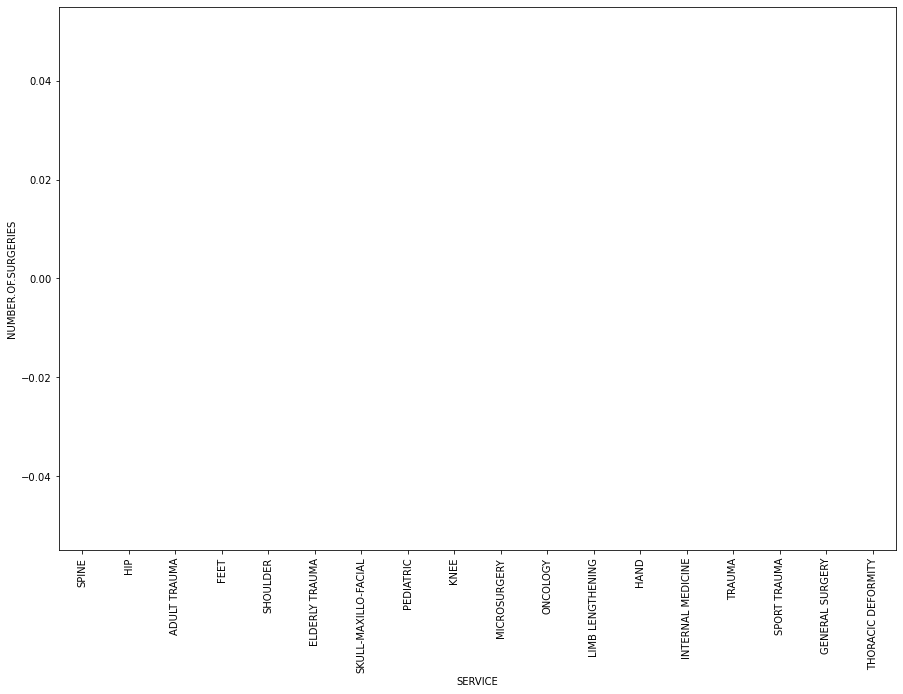

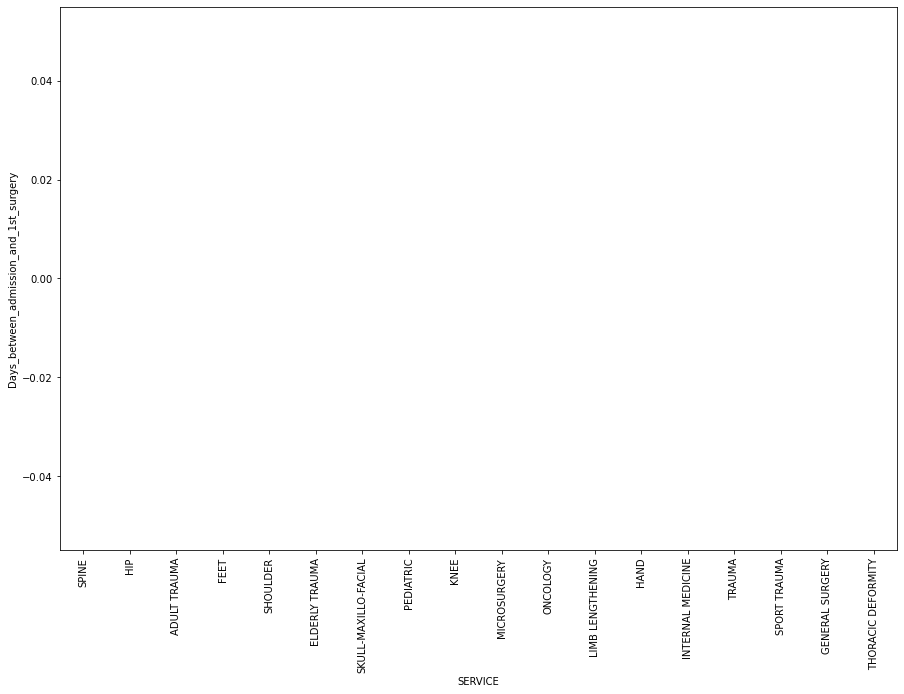

In [71]:
for i in ['AGE','NUMBER.OF.SURGERIES','Days_between_admission_and_1st_surgery']:
    plt.figure(figsize = (15,10))
    plt.xticks(rotation = 90)
    a=tem.sort_values(by=[i],ascending=False)
    a[i]=round(a[i],2)
    ax=sns.barplot(x =my_df['SERVICE'],
            y=i,
            data = a,
           ci=0)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.show()

In [72]:
for i in my_df['SERVICE'].unique():
    a=my_df[my_df['SERVICE']==i]
    print(i,a.groupby(['SEX'])['Len_Of_Stay'].describe())
    print('\n')

SPINE       count       mean        std  min  25%  50%   75%    max
SEX                                                          
F    1874.0  14.668090  21.051504  0.0  4.0  8.0  15.0  182.0
M    1678.0  17.092968  24.572086  0.0  4.0  8.0  18.0  178.0


HIP       count       mean        std  min  25%  50%   75%    max
SEX                                                          
F    3949.0  14.412763  21.605688  0.0  4.0  7.0  14.0  158.0
M    4698.0  12.342273  19.600978  0.0  4.0  5.0  11.0  159.0


ADULT TRAUMA       count       mean        std  min  25%  50%   75%    max
SEX                                                          
F    2035.0  11.244226  16.700462  0.0  3.0  6.0  11.0  135.0
M    5510.0  13.759710  19.390129  0.0  3.0  7.0  14.0  146.0


FEET       count      mean       std  min  25%  50%  75%   max
SEX                                                      
F    4618.0  3.116501  4.581732  0.0  2.0  2.0  3.0  49.0
M    3836.0  3.757821  5.690863  0.0  2.0  2.0  

In [73]:
my_data_copy.groupby(['SERVICE','COMORBIDITIES'])['Len_Of_Stay'].describe()

count       mean        std  min  \
SERVICE                    COMORBIDITIES                                      
ADULT TRAUMA               0              5141.0  14.148220  24.066797  0.0   
                           1              2444.0  13.750000  22.699971  0.0   
ELDERLY TRAUMA             0              1100.0  19.480000  33.495651  0.0   
                           1              2114.0  19.832072  29.690702  0.0   
FEET                       0              4385.0   3.575827   8.331836  0.0   
                           1              4114.0   4.045455   8.158181  0.0   
GENERAL PRACTICE           1                 1.0   2.000000        NaN  2.0   
GENERAL SURGERY            1                 2.0   1.000000   1.414214  0.0   
HAND                       0              5524.0   2.154417   4.785481  0.0   
                           1              7007.0   1.617525   3.384254  0.0   
HIP                        0              3249.0  15.306864  34.271109  0.0   
                           1              5443.0  14.077163  26.052958  0.0   
INACTIVE - SPORTS MEDICINE 1                 1.0   2.000000        NaN  2.0   
INTERNAL MEDICINE          0               200.0  18.725000  38.634603  0.0   
                           1               270.0  19.155556  58.044511  0.0   
KNEE                       0              4041.0   5.873546  14.750838  0.0   
                           1              8319.0   7.837721  13.533564  0.0   
LIMB LENGTHENING           0              1884.0   7.284501  15.162941  0.0   
                           1               896.0   7.218750  15.310460  0.0   
MICROSURGERY               0              1401.0   7.072091  13.784508  0.0   
                           1               518.0   7.000000  12.948193  0.0   
ONCOLOGY                   0              2439.0   4.860189  10.610358  0.0   
                           1              1352.0   5.454142  11.467495  0.0   
PAIN CLINIC                0                 2.0   5.000000   5.656854  1.0   
                           1                 1.0   4.000000        NaN  4.0   
PEDIATRIC                  0              3097.0   4.200194   9.695757  0.0   
                           1              1379.0   4.442350   8.344113  0.0   
SHOULDER                   0              2215.0   3.643792   6.987599  0.0   
                           1              3551.0   3.774148   6.939433  0.0   
SKULL-MAXILLO-FACIAL       0              2140.0   3.649533   6.202714  0.0   
                           1               912.0   4.066886   9.648198  0.0   
SPINE                      0              1685.0  19.210089  35.883286  0.0   
                           1              1885.0  15.447215  26.079903  0.0   
SPORT TRAUMA               0               168.0   2.303571   1.804050  0.0   
                           1                27.0   2.185185   0.681460  1.0   
THORACIC DEFORMITY         0                 8.0   4.250000   3.991061  2.0   
                           1                 1.0   3.000000        NaN  3.0   
TISSUE BANK                0               457.0   0.282276   2.035101  0.0   
TRAUMA                     0                42.0  14.214286  18.120916  0.0   
                           1                11.0  10.909091   5.990902  2.0   

                                           25%   50%    75%     max  
SERVICE                    COMORBIDITIES                             
ADULT TRAUMA               0              3.00   7.0  13.00   696.0  
                           1              3.00   6.0  12.25   322.0  
ELDERLY TRAUMA             0              5.00   9.0  19.00   514.0  
                           1              6.00  11.0  21.00   318.0  
FEET                       0              2.00   2.0   3.00   321.0  
                           1              2.00   2.0   4.00   154.0  
GENERAL PRACTICE           1              2.00   2.0   2.00     2.0  
GENERAL SURGERY            1              0.50   1.0   1.50     2.0  
HAND                    

In [74]:
my_data_copy = my_data_copy.loc[~my_data_copy['SERVICE'].isin(['GENERAL SURGERY','INACTIVE - SPORTS MEDICINE','GENERAL PRACTICE','PAIN CLINIC','THORACIC DEFORMITY'])]

In [75]:
my_data_copy.groupby(['SERVICE','TRANSFER.PLACE'])['Len_Of_Stay'].describe()

count  \
SERVICE      TRANSFER.PLACE                                              
ADULT TRAUMA                                                ...   41.0   
             ABRIGO JOSE SARAMANGO                          ...    1.0   
             ASSOC. HOSP. DE CAMBUCI                        ...    3.0   
             ASSOC. HOSP.SAO SEBASTIAO ALTO                 ...    8.0   
             ASSOC.CAR.HOSP.-NOVA IGUACU                    ...    1.0   
...                                                                ...   
TRAUMA       HOSPITAL EST. ALBERTO TORRES                   ...    1.0   
             HOSPITAL FEDERAL DO ANDARAI                    ...    1.0   
             HOSPITAL MUN. CELSO MARTINS                    ...    1.0   
             HOSPITAL MUNIC. DE MANGARATIBA                 ...    1.0   
             STA.CASA MISERICORDIA B. MANSA                 ...    1.0   

                                                                      mean  \
SERVICE      TRANSFER.PLACE                                                  
ADULT TRAUMA                                                ...  11.512195   
             ABRIGO JOSE SARAMANGO                          ...  21.000000   
             ASSOC. HOSP. DE CAMBUCI                        ...   9.000000   
             ASSOC. HOSP.SAO SEBASTIAO ALTO                 ...  14.625000   
             ASSOC.CAR.HOSP.-NOVA IGUACU                    ...   2.000000   
...                                                                    ...   
TRAUMA       HOSPITAL EST. ALBERTO TORRES                   ...  23.000000   
             HOSPITAL FEDERAL DO ANDARAI                    ...   5.000000   
             HOSPITAL MUN. CELSO MARTINS                    ...   4.000000   
             HOSPITAL MUNIC. DE MANGARATIBA                 ...  10.000000   
             STA.CASA MISERICORDIA B. MANSA                 ...  17.000000   

                                                                       std  \
SERVICE      TRANSFER.PLACE                                                  
ADULT TRAUMA                                                ...  13.860234   
             ABRIGO JOSE SARAMANGO                          ...        NaN   
             ASSOC. HOSP. DE CAMBUCI                        ...   5.567764   
             ASSOC. HOSP.SAO SEBASTIAO ALTO                 ...  16.079601   
             ASSOC.CAR.HOSP.-NOVA IGUACU                    ...        NaN   
...                                                                    ...   
TRAUMA       HOSPITAL EST. ALBERTO TORRES                   ...        NaN   
             HOSPITAL FEDERAL DO ANDARAI                    ...        NaN   
             HOSPITAL MUN. CELSO MARTINS                    ...        NaN   
             HOSPITAL MUNIC. DE MANGARATIBA                 ...        NaN   
             STA.CASA MISERICORDIA B. MANSA                 ...        NaN   

                                                                  min   25%  \
SERVICE      TRANSFER.PLACE                                                   
ADULT TRAUMA                                                ...   1.0   2.0   
             ABRIGO JOSE SARAMANGO                          ...  21.0  21.0   
             ASSOC. HOSP. DE CAMBUCI                        ...   4.0   6.0   
             ASSOC. HOSP.SAO SEBASTIAO ALTO                 ...   4.0   6.0   
             ASSOC.CAR.HOSP.-NOVA IGUACU                    ...   2.0   2.0   
...                                                               ...   ...   
TRAUMA       HOSPITAL EST. ALBERTO TORRES                   ...  23.0  23.0   
             HOSPITAL FEDERAL DO ANDARAI                    ...   5.0   5.0   
             HOSPITAL MUN. CELSO MARTINS                    ...   4.0   4.0   
             HOSPITAL MUNIC. DE MANGARATIBA                 ...  10.0  10.0   
             STA.CASA MISERICORDIA B. MANSA                 ...  17.0  17.0   

                                            

In [76]:
my_data_copy.groupby(['SERVICE','REASON.FOR.DISCHARGE'])['Len_Of_Stay'].describe()

count  \
SERVICE      REASON.FOR.DISCHARGE                                         
ADULT TRAUMA BY REQUEST                                            20.0   
             DEATH                                                 17.0   
             HOSPITALIZATION CANCELED                              26.0   
             MEDICAL DECISION                                    7434.0   
             PATIENT DECISION                                      44.0   
...                                                                 ...   
SPORT TRAUMA MEDICAL DECISION                                     194.0   
TISSUE BANK  MEDICAL DECISION                                      12.0   
             ORGAN, TISSUE AND CELL DONATION PROCESS - DEAD ...   445.0   
TRAUMA       DEATH                                                  1.0   
             MEDICAL DECISION                                      52.0   

                                                                      mean  \
SERVICE      REASON.FOR.DISCHARGE                                            
ADULT TRAUMA BY REQUEST                                          16.000000   
             DEATH                                               35.235294   
             HOSPITALIZATION CANCELED                             0.000000   
             MEDICAL DECISION                                    13.851090   
             PATIENT DECISION                                    24.840909   
...                                                                    ...   
SPORT TRAUMA MEDICAL DECISION                                     2.298969   
TISSUE BANK  MEDICAL DECISION                                     0.083333   
             ORGAN, TISSUE AND CELL DONATION PROCESS - DEAD ...   0.287640   
TRAUMA       DEATH                                                0.000000   
             MEDICAL DECISION                                    13.788462   

                                                                       std  \
SERVICE      REASON.FOR.DISCHARGE                                            
ADULT TRAUMA BY REQUEST                                          25.878257   
             DEATH                                               37.046473   
             HOSPITALIZATION CANCELED                             0.000000   
             MEDICAL DECISION                                    23.318333   
             PATIENT DECISION                                    25.449396   
...                                                                    ...   
SPORT TRAUMA MEDICAL DECISION                                     1.689130   
TISSUE BANK  MEDICAL DECISION                                     0.288675   
             ORGAN, TISSUE AND CELL DONATION PROCESS - DEAD ...   2.061652   
TRAUMA       DEATH                                                     NaN   
             MEDICAL DECISION                                    16.408196   

                                                                 min   25%  \
SERVICE      REASON.FOR.DISCHARGE                                            
ADULT TRAUMA BY REQUEST                                          0.0   2.0   
             DEATH                                               2.0  12.0   
             HOSPITALIZATION CANCELED                            0.0   0.0   
             MEDICAL DECISION                                    0.0   3.0   
             PATIENT DECISION                                    1.0   5.5   
...                                                              ...   ...   
SPORT TRAUMA MEDICAL DECISION                                    0.0   2.0   
TISSUE BANK  MEDICAL DECISION                                    0.0   0.0   
             ORGAN, TISSUE AND CELL DONATION PROCESS - DEAD ...  0.0   0.0   
TRAUMA       DEATH                                               0.0   0.0   
             MEDICAL DECISION                                    1.0   6.0   

                                             

#Regression for each service

In [77]:
for i in my_df['SERVICE'].unique():
    a=my_df[my_df['SERVICE']==i]
    print(len(a))
    if len(a)>=2:
        a['Len_Of_Stay'].fillna(0,inplace=True)
        a['Days_between_admission_and_1st_surgery'].fillna(0,inplace=True)
        # Build linear regression model
        # Split data into predictors X and output Y
        predictors = [ 'NUMBER.OF.SURGERIES','AGE','Days_between_admission_and_1st_surgery']
        X = a[predictors]
        y = a['Len_Of_Stay']
        model = sm.OLS(y, X).fit()
        print(i,model.summary())
        print('\n')

3552
SPINE                                  OLS Regression Results                                
Dep. Variable:            Len_Of_Stay   R-squared (uncentered):                   0.659
Model:                            OLS   Adj. R-squared (uncentered):              0.659
Method:                 Least Squares   F-statistic:                              2286.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                        0.00
Time:                        09:29:20   Log-Likelihood:                         -14934.
No. Observations:                3552   AIC:                                  2.987e+04
Df Residuals:                    3549   BIC:                                  2.989e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
--

D:\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
D:\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
D:\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
D:\anaconda3\

KNEE                                  OLS Regression Results                                
Dep. Variable:            Len_Of_Stay   R-squared (uncentered):                   0.530
Model:                            OLS   Adj. R-squared (uncentered):              0.530
Method:                 Least Squares   F-statistic:                              4617.
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                        0.00
Time:                        09:29:20   Log-Likelihood:                         -42956.
No. Observations:               12297   AIC:                                  8.592e+04
Df Residuals:                   12294   BIC:                                  8.594e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
--------

D:\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
D:\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
D:\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
D:\anaconda3\

#Q3

In [78]:
my_df.groupby(['COMORBIDITIES'])['Len_Of_Stay'].describe()

,count,mean,std,min,25%,50%,75%,max
COMORBIDITIES,,,,,,,,
0,38497.0,6.919396,13.557541,0.0,2.0,3.0,6.0,201.0
1,40045.0,7.345586,13.922293,0.0,2.0,3.0,7.0,206.0


<AxesSubplot:xlabel='COMORBIDITIES', ylabel='Len_Of_Stay'>

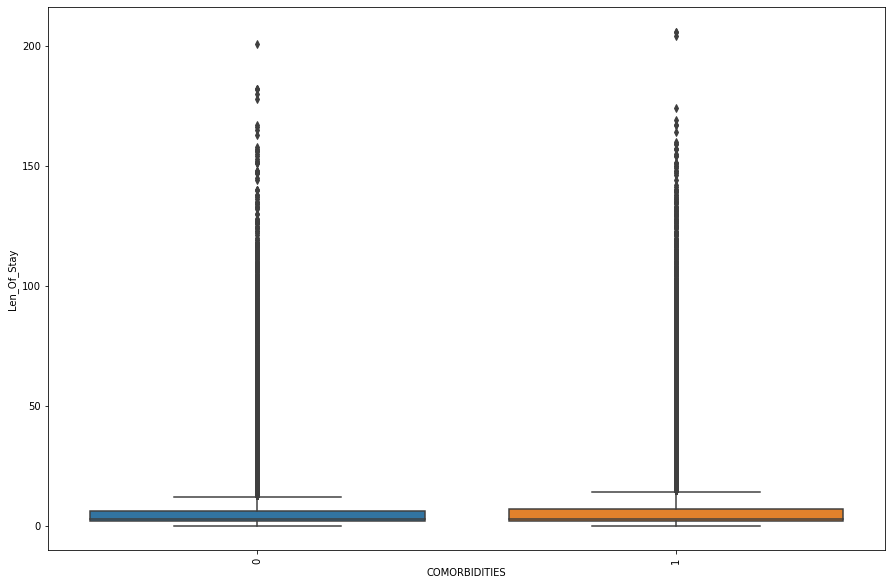

In [79]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
sns.boxplot(x='COMORBIDITIES',y='Len_Of_Stay',data=my_df)

In [80]:
my_df.groupby(['SERVICE','COMORBIDITIES'])['Len_Of_Stay'].describe()

count       mean        std  min  25%  \
SERVICE              COMORBIDITIES                                           
ADULT TRAUMA         0              5111.0  13.113285  18.446683  0.0  3.0   
                     1              2434.0  13.013969  19.330210  0.0  3.0   
ELDERLY TRAUMA       0              1094.0  17.886654  24.654278  0.0  5.0   
                     1              2102.0  18.532826  24.086739  0.0  6.0   
FEET                 0              4365.0   3.212371   4.654569  0.0  2.0   
                     1              4089.0   3.615798   5.575786  0.0  2.0   
GENERAL SURGERY      1                 1.0   0.000000        NaN  0.0  0.0   
HAND                 0              5485.0   1.822607   1.923235  0.0  1.0   
                     1              6983.0   1.466275   1.671702  0.0  1.0   
HIP                  0              3228.0  13.641884  21.028453  0.0  4.0   
                     1              5419.0  13.076951  20.283679  0.0  4.0   
INTERNAL MEDICINE    0               198.0  15.944444  27.027002  0.0  2.0   
                     1               268.0  14.951493  21.803890  0.0  4.0   
KNEE                 0              4024.0   5.266899   8.678094  0.0  2.0   
                     1              8273.0   7.193038   9.919470  0.0  3.0   
LIMB LENGTHENING     0              1873.0   6.545115  11.621397  0.0  2.0   
                     1               893.0   6.753639  13.003785  0.0  2.0   
MICROSURGERY         0              1394.0   6.462697  10.362232  0.0  3.0   
                     1               515.0   6.380583  10.092125  0.0  3.0   
ONCOLOGY             0              2428.0   4.413921   8.221516  0.0  1.0   
                     1              1344.0   4.869792   8.108911  0.0  1.0   
PEDIATRIC            0              3082.0   3.730694   5.288511  0.0  2.0   
                     1              1370.0   3.956204   5.360583  0.0  2.0   
SHOULDER             0              2203.0   3.260100   4.438599  0.0  2.0   
                     1              3531.0   3.411781   4.552286  0.0  2.0   
SKULL-MAXILLO-FACIAL 0              2130.0   3.381221   3.439229  0.0  2.0   
                     1               906.0   3.395143   3.552066  0.0  2.0   
SPINE                0              1673.0  17.115959  24.076030  0.0  5.0   
                     1              1879.0  14.654071  21.563725  0.0  4.0   
SPORT TRAUMA         0               167.0   2.191617   1.075097  0.0  2.0   
                     1                27.0   2.185185   0.681460  1.0  2.0   
THORACIC DEFORMITY   0                 1.0   2.000000        NaN  2.0  2.0   
TRAUMA               0                41.0  12.439024  14.174006  0.0  5.0   
                     1                11.0  10.909091   5.990902  2.0  7.5   

                                     50%    75%    max  
SERVICE              COMORBIDITIES                      
ADULT TRAUMA         0               7.0  13.00  140.0  
                     1               6.0  12.00  146.0  
ELDERLY TRAUMA       0               9.0  18.75  182.0  
                     1              10.0  20.00  206.0  
FEET                 0               2.0   3.00   49.0  
                     1               2.0   4.00   49.0  
GENERAL SURGERY      1               0.0   0.00    0.0  
HAND                 0               2.0   2.00   26.0  
                     1               1.0   2.00   26.0  
HIP                  0               6.0  12.00  158.0  
                     1               6.0  12.00  159.0  
INTERNAL MEDICINE    0               5.5  16.75  201.0  
                     1               9.0  17.25  204.0  
KNEE                 0               3.0   5.00   90.0  
                     1               4.0   7.00   91.0  
LIMB LENGTHENING     0               3.0   6.00  108.0  
                     1               2.0   5.00  107.0  
MICROSURGERY         0               3.0   5.00   96.0  
                     1               3.0   4.00   77.0  
ONCOLOGY             0         

In [81]:
for i in my_df['SERVICE'].unique():
    a=my_df[my_df['SERVICE']==i]
    print(len(a))
    if len(a)>=2:
        a['Len_Of_Stay'].fillna(0,inplace=True)
        # Build linear regression model
        # Split data into predictors X and output Y
        predictors = [ 'COMORBIDITIES']
        X = a[predictors]
        y = a['Len_Of_Stay']
        model = sm.OLS(y, X).fit()
        print(i,model.summary())
        print('\n')

3552
SPINE                                  OLS Regression Results                                
Dep. Variable:            Len_Of_Stay   R-squared (uncentered):                   0.147
Model:                            OLS   Adj. R-squared (uncentered):              0.147
Method:                 Least Squares   F-statistic:                              614.3
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                   3.25e-125
Time:                        09:29:21   Log-Likelihood:                         -16561.
No. Observations:                3552   AIC:                                  3.312e+04
Df Residuals:                    3551   BIC:                                  3.313e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

D:\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
D:\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
D:\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
D:\anaconda3\

SPORT TRAUMA                                  OLS Regression Results                                
Dep. Variable:            Len_Of_Stay   R-squared (uncentered):                   0.114
Model:                            OLS   Adj. R-squared (uncentered):              0.109
Method:                 Least Squares   F-statistic:                              24.73
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                    1.45e-06
Time:                        09:29:21   Log-Likelihood:                         -434.93
No. Observations:                 194   AIC:                                      871.9
Df Residuals:                     193   BIC:                                      875.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

#t test

In [82]:
#df_0=my_df[my_df['COMORBIDITIES']==0]
#df_1=my_df[my_df['COMORBIDITIES']==1]
#stats.ttest_ind(df_1['Len_Of_Stay'], df_0['Len_Of_Stay'],equal_var=False)

In [83]:
rp.ttest(group1= my_df['Len_Of_Stay'][my_df['COMORBIDITIES'] == 1], group1_name= "1",
         group2= my_df['Len_Of_Stay'][my_df['COMORBIDITIES'] == 0], group2_name= "0")

(   Variable        N      Mean         SD        SE  95% Conf.  Interval
 0         1  40045.0  7.345586  13.922293  0.069572   7.209223  7.481950
 1         0  38497.0  6.919396  13.557541  0.069098   6.783962  7.054831
 2  combined  78542.0  7.136691  13.746285  0.049049   7.040555  7.232828,
           Independent t-test     results
 0      Difference (1 - 0) =       0.4262
 1      Degrees of freedom =   78540.0000
 2                       t =       4.3441
 3   Two side test p value =       0.0000
 4  Difference < 0 p value =       1.0000
 5  Difference > 0 p value =       0.0000
 6               Cohen's d =       0.0310
 7               Hedge's g =       0.0310
 8          Glass's delta1 =       0.0306
 9        Point-Biserial r =       0.0155)

#ANOVA TEST

In [84]:
sam = my_df.sample(8000)

In [85]:
aov = pg.anova(data = sam, dv ='Len_Of_Stay', between='COMORBIDITIES', detailed = True)

In [86]:
aov

,Source,SS,DF,MS,F,p-unc,np2
0,COMORBIDITIES,6.033116e+02,1,603.311560,3.214075,0.073045,0.000402
1,Within,1.501298e+06,7998,187.709223,NaN,NaN,NaN


In [87]:
for i in my_df['SERVICE'].unique():
    a=my_df[my_df['SERVICE']==i]
    print(i,rp.ttest(group1= a['Len_Of_Stay'][a['COMORBIDITIES'] == 0], group1_name= "None",
         group2= a['Len_Of_Stay'][a['COMORBIDITIES'] == 1], group2_name= "Comorbidities"),'\n')

SPINE (        Variable       N       Mean         SD        SE  95% Conf.   Interval
0           None  1673.0  17.115959  24.076030  0.588623  15.961445  18.270474
1  Comorbidities  1879.0  14.654071  21.563725  0.497463  13.678434  15.629709
2       combined  3552.0  15.813626  22.811452  0.382751  15.063192  16.564060,                      Independent t-test    results
0  Difference (None - Comorbidities) =      2.4619
1                 Degrees of freedom =   3550.0000
2                                  t =      3.2148
3              Two side test p value =      0.0013
4             Difference < 0 p value =      0.9993
5             Difference > 0 p value =      0.0007
6                          Cohen's d =      0.1081
7                          Hedge's g =      0.1080
8                     Glass's delta1 =      0.1023
9                   Point-Biserial r =      0.0539) 

HIP (        Variable       N       Mean         SD        SE  95% Conf.   Interval
0           None  3228.0  13

D:\anaconda3\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=a

In [88]:
a=my_df.groupby(['SERVICE','COMORBIDITIES'])['Len_Of_Stay'].describe().sort_values(by=['count'],ascending=False).unstack()['mean']

Text(0.5, 1.0, 'Comordities vs Length of Stay')

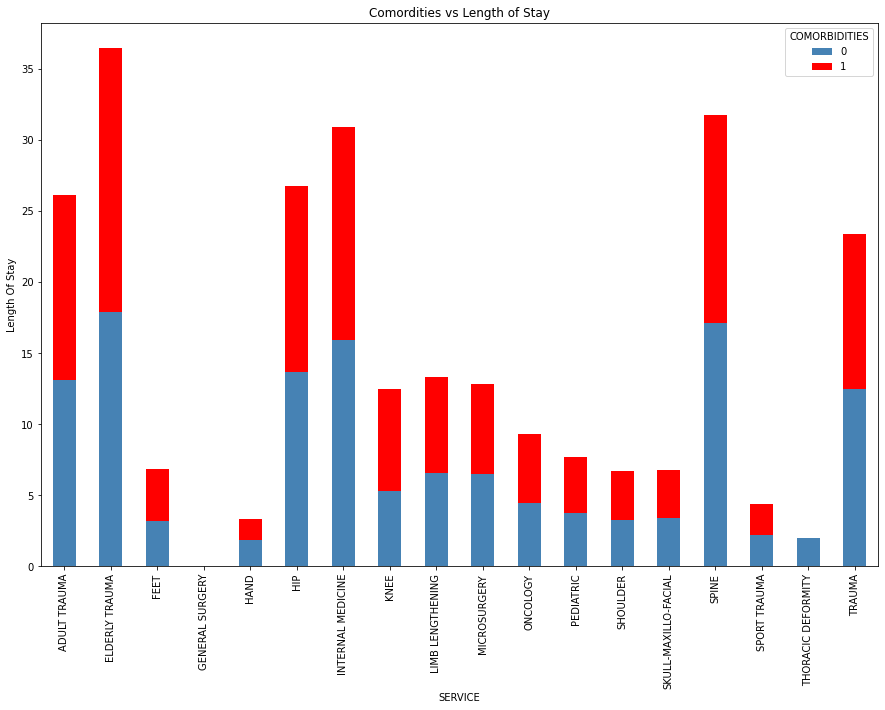

In [89]:
ax = a.plot(kind='bar', stacked=True, color=['steelblue', 'red'],figsize = (15,10))
ax.set_ylabel("Length Of Stay")
ax.set_title("Comordities vs Length of Stay")

#Q4

#Reason For Discharge

In [90]:
my_df=my_df[my_df['REASON.FOR.DISCHARGE'].notna()]

In [91]:
my_df.groupby(['REASON.FOR.DISCHARGE'])['Len_Of_Stay'].describe()

,count,mean,std,min,25%,50%,75%,max
REASON.FOR.DISCHARGE,,,,,,,,
BY REQUEST,118.0,7.703390,15.515258,0.0,1.0,3.0,6.0,109.0
COMPLIANCE WITH THE OBJECTIVES OF THE HOME CARE PLAN,4.0,4.500000,6.350853,1.0,1.0,1.5,5.0,14.0
DEATH,460.0,40.347826,36.662874,0.0,13.0,28.0,56.0,182.0
HOSPITALIZATION CANCELED,554.0,0.218412,1.661484,0.0,0.0,0.0,0.0,33.0
MEDICAL DECISION,76930.0,6.893553,13.075235,0.0,2.0,3.0,6.0,206.0
NON-COMPLIANCE WITH ADMISSION CRITERIA,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
PATIENT DECISION,196.0,15.102041,23.047327,0.0,1.0,5.5,16.0,139.0
PERMANENCE DUE TO DISEASE CHARACTERISTICS,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0
PERMANENCE DUE TO INTERCORRENCE,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


In [92]:
for i in my_data_copy['SERVICE'].unique():
    print(i)
    display(my_data_copy[my_data_copy['SERVICE']==i].groupby(by=['REASON.FOR.DISCHARGE'])['Len_Of_Stay'].describe())

SPINE


,count,mean,std,min,25%,50%,75%,max
REASON.FOR.DISCHARGE,,,,,,,,
BY REQUEST,6.0,14.500000,19.664689,1.0,2.75,7.5,14.50,53.0
DEATH,52.0,75.307692,101.126118,1.0,16.75,42.0,85.75,588.0
HOSPITALIZATION CANCELED,39.0,0.128205,0.570295,0.0,0.00,0.0,0.00,3.0
MEDICAL DECISION,3423.0,16.069530,26.796937,0.0,4.00,8.0,15.00,500.0
PATIENT DECISION,11.0,4.818182,7.025926,0.0,0.50,1.0,5.00,19.0
SPEECH THERAPISTS DECISION,1.0,7.000000,NaN,7.0,7.00,7.0,7.00,7.0
TRANSFER,38.0,63.500000,74.706543,2.0,17.75,42.0,82.75,428.0


HIP


,count,mean,std,min,25%,50%,75%,max
REASON.FOR.DISCHARGE,,,,,,,,
BY REQUEST,24.0,5.708333,13.601404,0.0,1.0,2.0,4.25,68.0
DEATH,109.0,63.605505,77.912465,1.0,19.0,42.0,80.00,589.0
HOSPITALIZATION CANCELED,69.0,0.550725,2.159359,0.0,0.0,0.0,0.00,16.0
MEDICAL DECISION,8421.0,13.846812,27.577260,0.0,4.0,6.0,12.00,1215.0
PATIENT DECISION,29.0,27.896552,38.133548,0.0,3.0,9.0,45.00,139.0
SPEECH THERAPISTS DECISION,1.0,5.000000,NaN,5.0,5.0,5.0,5.00,5.0
TRANSFER,39.0,46.871795,45.731010,1.0,13.5,23.0,72.00,209.0


ADULT TRAUMA


,count,mean,std,min,25%,50%,75%,max
REASON.FOR.DISCHARGE,,,,,,,,
BY REQUEST,20.0,16.000000,25.878257,0.0,2.0,5.0,19.75,109.0
DEATH,17.0,35.235294,37.046473,2.0,12.0,23.0,40.00,135.0
HOSPITALIZATION CANCELED,26.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
MEDICAL DECISION,7434.0,13.851090,23.318333,0.0,3.0,7.0,13.00,696.0
PATIENT DECISION,44.0,24.840909,25.449396,1.0,5.5,10.5,40.50,85.0
PERMANENCE DUE TO DISEASE CHARACTERISTICS,1.0,2.000000,NaN,2.0,2.0,2.0,2.00,2.0
TRANSFER,43.0,31.581395,48.906730,0.0,11.0,17.0,35.00,315.0


FEET


,count,mean,std,min,25%,50%,75%,max
REASON.FOR.DISCHARGE,,,,,,,,
BY REQUEST,7.0,4.857143,10.302566,0.0,0.00,1.0,2.5,28.0
DEATH,6.0,71.833333,64.182292,10.0,30.75,43.0,126.5,154.0
HOSPITALIZATION CANCELED,31.0,1.064516,5.926975,0.0,0.00,0.0,0.0,33.0
MEDICAL DECISION,8428.0,3.721879,7.634946,0.0,2.00,2.0,3.0,321.0
PATIENT DECISION,19.0,9.105263,13.366188,0.0,1.00,2.0,13.5,52.0
REOPERATION,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
TRANSFER,7.0,40.285714,63.107618,3.0,7.00,25.0,29.5,181.0


SHOULDER


,count,mean,std,min,25%,50%,75%,max
REASON.FOR.DISCHARGE,,,,,,,,
BY REQUEST,9.0,1.888889,0.781736,1.0,1.00,2.0,2.0,3.0
DEATH,4.0,26.500000,23.572583,2.0,14.00,23.0,35.5,58.0
HOSPITALIZATION CANCELED,48.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
MEDICAL DECISION,5684.0,3.741203,6.945811,0.0,2.00,2.0,3.0,142.0
PATIENT DECISION,15.0,3.733333,5.035115,0.0,1.00,2.0,3.5,16.0
REOPERATION,2.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
TRANSFER,4.0,6.750000,4.272002,2.0,4.25,6.5,9.0,12.0


ELDERLY TRAUMA


,count,mean,std,min,25%,50%,75%,max
REASON.FOR.DISCHARGE,,,,,,,,
BY REQUEST,4.0,15.000000,20.049938,3.0,5.25,6.0,15.75,45.0
DEATH,192.0,51.609375,62.899808,0.0,15.00,30.0,68.25,514.0
HOSPITALIZATION CANCELED,11.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
MEDICAL DECISION,2949.0,17.478467,26.093610,0.0,5.00,10.0,18.00,328.0
NON-COMPLIANCE WITH ADMISSION CRITERIA,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
PATIENT DECISION,11.0,22.636364,22.033033,1.0,8.00,15.0,29.00,66.0
SPEECH THERAPISTS DECISION,2.0,3.500000,2.121320,2.0,2.75,3.5,4.25,5.0
TRANSFER,44.0,36.000000,48.163481,0.0,14.50,20.0,44.75,287.0


SKULL-MAXILLO-FACIAL


,count,mean,std,min,25%,50%,75%,max
REASON.FOR.DISCHARGE,,,,,,,,
BY REQUEST,9.0,14.777778,21.753033,0.0,1.0,3.0,17.0,55.0
DEATH,5.0,83.400000,95.667654,5.0,12.0,27.0,165.0,208.0
HOSPITALIZATION CANCELED,22.0,0.136364,0.351250,0.0,0.0,0.0,0.0,1.0
MEDICAL DECISION,3009.0,3.640412,5.579364,0.0,2.0,2.0,4.0,149.0
PATIENT DECISION,6.0,1.333333,0.816497,0.0,1.0,1.5,2.0,2.0
TRANSFER,1.0,4.000000,NaN,4.0,4.0,4.0,4.0,4.0


PEDIATRIC


,count,mean,std,min,25%,50%,75%,max
REASON.FOR.DISCHARGE,,,,,,,,
BY REQUEST,3.0,3.333333,2.516611,1.0,2.0,3.0,4.5,6.0
COMPLIANCE WITH THE OBJECTIVES OF THE HOME CARE PLAN,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0
HOSPITALIZATION CANCELED,94.0,0.063830,0.321572,0.0,0.0,0.0,0.0,2.0
MEDICAL DECISION,4365.0,4.364948,9.390129,0.0,2.0,2.0,4.0,329.0
PATIENT DECISION,3.0,1.000000,1.000000,0.0,0.5,1.0,1.5,2.0
TRANSFER,10.0,6.000000,7.118052,0.0,1.0,4.0,7.5,22.0


KNEE


,count,mean,std,min,25%,50%,75%,max
REASON.FOR.DISCHARGE,,,,,,,,
BY REQUEST,20.0,6.350000,12.762094,0.0,1.00,2.0,5.0,58.0
DEATH,46.0,61.043478,48.437339,2.0,31.00,49.0,88.5,209.0
HOSPITALIZATION CANCELED,78.0,0.217949,0.934858,0.0,0.00,0.0,0.0,6.0
MEDICAL DECISION,12185.0,6.997948,13.075457,0.0,2.00,4.0,7.0,589.0
PATIENT DECISION,17.0,8.352941,8.936870,0.0,1.00,4.0,15.0,26.0
TRANSFER,14.0,40.928571,71.435247,0.0,11.25,18.5,38.5,282.0


MICROSURGERY


,count,mean,std,min,25%,50%,75%,max
REASON.FOR.DISCHARGE,,,,,,,,
BY REQUEST,9.0,2.666667,3.570714,0.0,0.00,1.0,5.00,10.0
DEATH,2.0,21.500000,0.707107,21.0,21.25,21.5,21.75,22.0
HOSPITALIZATION CANCELED,25.0,0.040000,0.200000,0.0,0.00,0.0,0.00,1.0
MEDICAL DECISION,1873.0,7.123332,13.637330,0.0,3.00,3.0,5.00,232.0
PATIENT DECISION,7.0,12.285714,16.570197,1.0,4.00,9.0,9.50,49.0
TRANSFER,3.0,12.666667,18.475209,2.0,2.00,2.0,18.00,34.0


ONCOLOGY


,count,mean,std,min,25%,50%,75%,max
REASON.FOR.DISCHARGE,,,,,,,,
BY REQUEST,2.0,23.000000,24.041631,6.0,14.5,23.0,31.5,40.0
DEATH,39.0,23.871795,20.909806,1.0,10.5,20.0,32.0,92.0
HOSPITALIZATION CANCELED,34.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
MEDICAL DECISION,3679.0,4.733623,10.208524,0.0,1.0,2.0,4.0,202.0
PATIENT DECISION,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
SPEECH THERAPISTS DECISION,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0
TRANSFER,35.0,23.828571,26.499152,0.0,7.0,14.0,32.5,131.0


LIMB LENGTHENING


,count,mean,std,min,25%,50%,75%,max
REASON.FOR.DISCHARGE,,,,,,,,
BY REQUEST,3.0,3.333333,2.516611,1.0,2.00,3.0,4.5,6.0
DEATH,1.0,10.000000,NaN,10.0,10.00,10.0,10.0,10.0
HOSPITALIZATION CANCELED,23.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0
MEDICAL DECISION,2738.0,7.219138,14.892337,0.0,2.00,3.0,5.0,169.0
PATIENT DECISION,11.0,18.636364,22.335052,1.0,2.00,7.0,37.0,59.0
TRANSFER,4.0,50.250000,82.915117,0.0,5.25,13.5,58.5,174.0


HAND


,count,mean,std,min,25%,50%,75%,max
REASON.FOR.DISCHARGE,,,,,,,,
BY REQUEST,3.0,2.666667,1.527525,1.0,2.0,3.0,3.50,4.0
COMPLIANCE WITH THE OBJECTIVES OF THE HOME CARE PLAN,3.0,5.333333,7.505553,1.0,1.0,1.0,7.50,14.0
DEATH,3.0,29.000000,29.051678,1.0,14.0,27.0,43.00,59.0
HOSPITALIZATION CANCELED,51.0,0.313725,0.616123,0.0,0.0,0.0,0.00,2.0
MEDICAL DECISION,12448.0,1.845919,4.013119,0.0,1.0,1.0,2.00,151.0
PATIENT DECISION,18.0,6.888889,12.121390,0.0,1.0,3.0,4.75,50.0
PERMANENCE DUE TO INTERCORRENCE,1.0,1.000000,NaN,1.0,1.0,1.0,1.00,1.0
PHYSIOTHERAPY DECISION,1.0,2.000000,NaN,2.0,2.0,2.0,2.00,2.0
SPEECH THERAPISTS DECISION,1.0,1.000000,NaN,1.0,1.0,1.0,1.00,1.0


INTERNAL MEDICINE


,count,mean,std,min,25%,50%,75%,max
REASON.FOR.DISCHARGE,,,,,,,,
BY REQUEST,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
DEATH,25.0,58.800000,166.436675,3.0,9.00,16.0,35.00,847.0
HOSPITALIZATION CANCELED,2.0,1.000000,1.414214,0.0,0.50,1.0,1.50,2.0
MEDICAL DECISION,404.0,17.044554,34.200953,0.0,3.00,7.0,17.00,318.0
PATIENT DECISION,6.0,10.166667,11.285684,1.0,4.00,7.0,10.00,32.0
TRANSFER,32.0,15.562500,27.534070,0.0,0.75,1.0,22.25,106.0


TRAUMA


,count,mean,std,min,25%,50%,75%,max
REASON.FOR.DISCHARGE,,,,,,,,
DEATH,1.0,0.000000,NaN,0.0,0.0,0.0,0.00,0.0
MEDICAL DECISION,52.0,13.788462,16.408196,1.0,6.0,9.0,12.25,87.0


SPORT TRAUMA


,count,mean,std,min,25%,50%,75%,max
REASON.FOR.DISCHARGE,,,,,,,,
HOSPITALIZATION CANCELED,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
MEDICAL DECISION,194.0,2.298969,1.68913,0.0,2.0,2.0,2.0,21.0


TISSUE BANK


,count,mean,std,min,25%,50%,75%,max
REASON.FOR.DISCHARGE,,,,,,,,
MEDICAL DECISION,12.0,0.083333,0.288675,0.0,0.0,0.0,0.0,1.0
"ORGAN, TISSUE AND CELL DONATION PROCESS - DEAD DONOR",445.0,0.287640,2.061652,0.0,0.0,0.0,0.0,28.0


#Transfer place

In [93]:
for i in my_data_copy['SERVICE'].unique():
    a=my_data_copy[my_data_copy['SERVICE']==i]
    print(i,rp.ttest(group1= a['Len_Of_Stay'][a['TRANSFER_PLACE'] == 'HOME'], group1_name= "HOME",
         group2= a['Len_Of_Stay'][a['TRANSFER_PLACE'] == 'HOSPITAL'], group2_name= "HOSPITAL"),'\n')

KeyError: 'TRANSFER_PLACE'

In [94]:
my_data_copy.loc[ my_data_copy['TRANSFER.PLACE'] !='HOME                                            ', 'TRANSFER_PLACE'] = 'HOSPITAL'

In [95]:
my_data_copy['TRANSFER.PLACE'].value_counts()

HOME                                                      69692
HOSPITAL DA POSSE                                          1195
HOSP. MUNICIPAL SOUZA AGUIAR                                659
                                                            489
HOSPITAL EST. ALBERTO TORRES                                442
                                                          ...  
HOSPITAL BASILEU ESTRELA                                      1
HOSPITAL DE BASE PORTO VELHO                                  1
HOSPITAL REGIONAL DE ARAGUAINA                                1
PAM CAMPO GRANDE                                              1
HOSPITAL PRO-VITA                                             1
Name: TRANSFER.PLACE, Length: 407, dtype: int64

In [96]:
my_data_copy['TRANSFER_PLACE'].value_counts()

HOSPITAL    9718
Name: TRANSFER_PLACE, dtype: int64

In [97]:
for i in my_data_copy['SERVICE'].unique():
    print(i)
    display(my_data_copy[my_data_copy['SERVICE']==i].groupby(by=['TRANSFER_PLACE'])['Len_Of_Stay'].describe())

SPINE


,count,mean,std,min,25%,50%,75%,max
TRANSFER_PLACE,,,,,,,,
HOSPITAL,360.0,29.263889,43.655078,0.0,8.0,17.0,30.0,500.0


HIP


,count,mean,std,min,25%,50%,75%,max
TRANSFER_PLACE,,,,,,,,
HOSPITAL,834.0,25.088729,31.828952,0.0,9.0,15.0,28.0,350.0


ADULT TRAUMA


,count,mean,std,min,25%,50%,75%,max
TRANSFER_PLACE,,,,,,,,
HOSPITAL,3691.0,13.08155,20.600119,0.0,4.0,7.0,13.0,315.0


FEET


,count,mean,std,min,25%,50%,75%,max
TRANSFER_PLACE,,,,,,,,
HOSPITAL,462.0,7.238095,11.820954,0.0,2.0,4.0,7.0,154.0


SHOULDER


,count,mean,std,min,25%,50%,75%,max
TRANSFER_PLACE,,,,,,,,
HOSPITAL,337.0,9.062315,10.823763,0.0,3.0,6.0,11.0,113.0


ELDERLY TRAUMA


,count,mean,std,min,25%,50%,75%,max
TRANSFER_PLACE,,,,,,,,
HOSPITAL,2032.0,18.520669,25.798743,0.0,7.0,11.0,20.0,328.0


SKULL-MAXILLO-FACIAL


,count,mean,std,min,25%,50%,75%,max
TRANSFER_PLACE,,,,,,,,
HOSPITAL,327.0,7.642202,9.20475,0.0,4.0,6.0,9.0,149.0


PEDIATRIC


,count,mean,std,min,25%,50%,75%,max
TRANSFER_PLACE,,,,,,,,
HOSPITAL,126.0,8.0,9.387651,1.0,4.0,6.0,7.0,57.0


KNEE


,count,mean,std,min,25%,50%,75%,max
TRANSFER_PLACE,,,,,,,,
HOSPITAL,205.0,14.321951,23.816779,0.0,4.0,6.0,13.0,193.0


MICROSURGERY


,count,mean,std,min,25%,50%,75%,max
TRANSFER_PLACE,,,,,,,,
HOSPITAL,79.0,28.025316,39.273523,1.0,3.0,13.0,35.5,232.0


ONCOLOGY


,count,mean,std,min,25%,50%,75%,max
TRANSFER_PLACE,,,,,,,,
HOSPITAL,177.0,10.909605,14.739895,0.0,2.0,5.0,13.0,92.0


LIMB LENGTHENING


,count,mean,std,min,25%,50%,75%,max
TRANSFER_PLACE,,,,,,,,
HOSPITAL,78.0,21.141026,30.994228,1.0,3.25,8.0,18.0,137.0


HAND


,count,mean,std,min,25%,50%,75%,max
TRANSFER_PLACE,,,,,,,,
HOSPITAL,462.0,4.75974,7.710085,0.0,2.0,2.0,5.0,70.0


INTERNAL MEDICINE


,count,mean,std,min,25%,50%,75%,max
TRANSFER_PLACE,,,,,,,,
HOSPITAL,52.0,23.096154,24.066297,2.0,8.75,16.0,26.75,132.0


TRAUMA


,count,mean,std,min,25%,50%,75%,max
TRANSFER_PLACE,,,,,,,,
HOSPITAL,39.0,9.179487,5.165023,0.0,6.0,8.0,12.0,23.0


SPORT TRAUMA


ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

In [ ]:
my_data_copy['TRANSFER_PLACE'].fillna('HOME',inplace=True)

In [98]:
for i in my_data_copy['SERVICE'].unique():
    a=my_data_copy[my_data_copy['SERVICE']==i]
    print(i,rp.ttest(group1= a['Len_Of_Stay'][a['TRANSFER_PLACE'] == 'HOME'], group1_name= "HOME",
         group2= a['Len_Of_Stay'][a['TRANSFER_PLACE'] == 'HOSPITAL'], group2_name= "HOSPITAL"),'\n')

D:\anaconda3\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret

SPINE (   Variable      N       Mean         SD        SE  95% Conf.   Interval
0      HOME    0.0        NaN        NaN       NaN        NaN        NaN
1  HOSPITAL  360.0  29.263889  43.655078  2.300825  24.739101  33.788677
2  combined  360.0  29.263889  43.655078  2.300825  24.739101  33.788677,                 Independent t-test  results
0  Difference (HOME - HOSPITAL) =       NaN
1            Degrees of freedom =     358.0
2                             t =       NaN
3         Two side test p value =       NaN
4        Difference < 0 p value =       NaN
5        Difference > 0 p value =       NaN
6                     Cohen's d =       NaN
7                     Hedge's g =       NaN
8                Glass's delta1 =       NaN
9              Point-Biserial r =       NaN) 

HIP (   Variable      N       Mean         SD        SE  95% Conf.  Interval
0      HOME    0.0        NaN        NaN       NaN        NaN       NaN
1  HOSPITAL  834.0  25.088729  31.828952  1.102146  22.925418  2

D:\anaconda3\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
D:\anaconda3\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret

#Hue Graph

In [99]:
a=my_data_copy.groupby(['SERVICE','TRANSFER_PLACE'])['Len_Of_Stay'].describe()
a= a.reset_index()

Text(0.5, 1.0, 'Transfer Place vs Length of Stay')

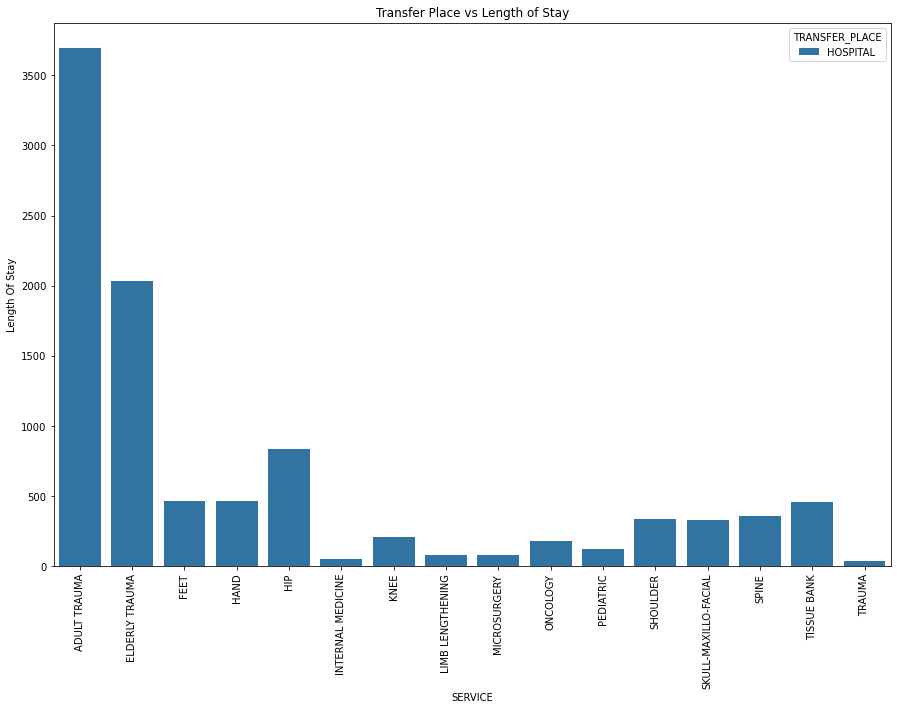

In [100]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
ax=sns.barplot(data=a, x="SERVICE", y="count", hue="TRANSFER_PLACE")
ax.set_ylabel("Length Of Stay")
ax.set_title("Transfer Place vs Length of Stay")

In [101]:
my

NameError: name 'my' is not defined

#Days between admission and 1st surgery

#Correlation

In [102]:
for i in my_df['SERVICE'].unique():
    a=my_df[my_df['SERVICE']==i]
    #print(i,'\n',np.corrcoef(a[Days_between_admission_and_1st_surgery], a[Len_Of_Stay]),'\n')
    print(i,'\n',a.corr()['Len_Of_Stay'],'\n')

SPINE 
 MEDICAL.RECORD                                  0.074149
AGE                                            -0.062393
NUMBER.OF.SURGERIES                             0.628444
DOCTOR                                          0.003366
COMORBIDITIES                                  -0.053878
Len_Of_Stay                                     1.000000
Days_between_admission_and_1st_surgery          0.414667
Days_between_actual_discharge_and_forecasted    0.937390
F                                              -0.053077
M                                               0.053077
Name: Len_Of_Stay, dtype: float64 

HIP 
 MEDICAL.RECORD                                 -0.033121
AGE                                             0.125253
NUMBER.OF.SURGERIES                             0.459111
DOCTOR                                         -0.010070
COMORBIDITIES                                  -0.013288
Len_Of_Stay                                     1.000000
Days_between_admission_and_1st_surgery

In [111]:
my_df.corr()

,MEDICAL.RECORD,AGE,NUMBER.OF.SURGERIES,DOCTOR,COMORBIDITIES,Len_Of_Stay,Days_between_admission_and_1st_surgery,Days_between_actual_discharge_and_forecasted,F,M
MEDICAL.RECORD,1.000000,-0.184699,0.030358,0.141740,-0.175456,-0.034748,0.027325,-0.020300,-0.103375,0.103375
AGE,-0.184699,1.000000,0.000062,-0.136854,0.414730,0.113848,0.106274,0.084770,0.234747,-0.234747
NUMBER.OF.SURGERIES,0.030358,0.000062,1.000000,-0.046692,-0.023679,0.487560,0.121593,0.474472,-0.024135,0.024135
DOCTOR,0.141740,-0.136854,-0.046692,1.000000,-0.055835,-0.064272,-0.048824,-0.066934,0.007480,-0.007480
COMORBIDITIES,-0.175456,0.414730,-0.023679,-0.055835,1.000000,0.015499,0.006183,0.001259,0.213519,-0.213519
Len_Of_Stay,-0.034748,0.113848,0.487560,-0.064272,0.015499,1.000000,0.502000,0.924105,-0.025589,0.025589
Days_between_admission_and_1st_surgery,0.027325,0.106274,0.121593,-0.048824,0.006183,0.502000,1.000000,0.452953,-0.023868,0.023868
Days_between_actual_discharge_and_forecasted,-0.020300,0.084770,0.474472,-0.066934,0.001259,0.924105,0.452953,1.000000,-0.029485,0.029485
F,-0.103375,0.234747,-0.024135,0.007480,0.213519,-0.025589,-0.023868,-0.029485,1.000000,-1.000000
M,0.103375,-0.234747,0.024135,-0.007480,-0.213519,0.025589,0.023868,0.029485,-1.000000,1.000000


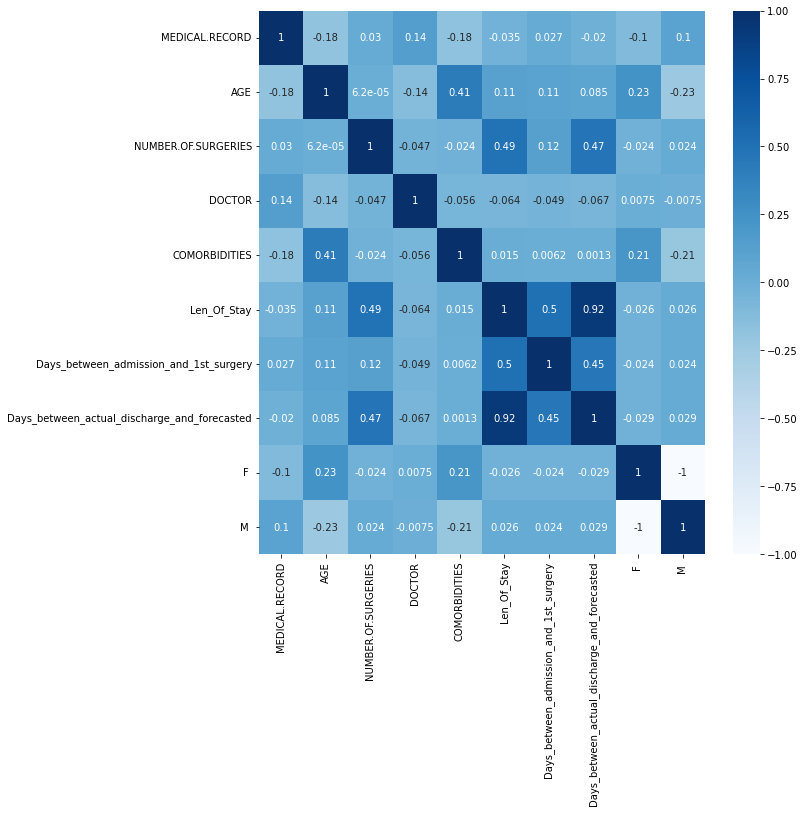

In [116]:

plt.figure(figsize = (10,10))
sns.heatmap(my_df.corr(),cmap="Blues",annot=True)
plt.show()
print('\n')

SPINE
Days_between_admission_and_1st_surgery    0.414667
Name: Len_Of_Stay, dtype: float64


C:\Users\31125\AppData\Local\Temp/ipykernel_43896/1404799940.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ax=sns.heatmap(a.corr().iloc[[6]]['Len_Of_Stay'][:, np.newaxis],cmap="Blues",annot=True,yticklabels=['Time until 1st surgery'],xticklabels=['Len_Of_Stay'])


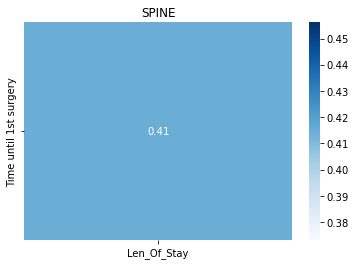



HIP
Days_between_admission_and_1st_surgery    0.454659
Name: Len_Of_Stay, dtype: float64


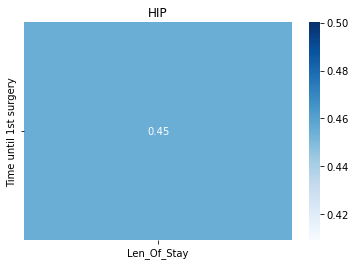



ADULT TRAUMA
Days_between_admission_and_1st_surgery    0.322668
Name: Len_Of_Stay, dtype: float64


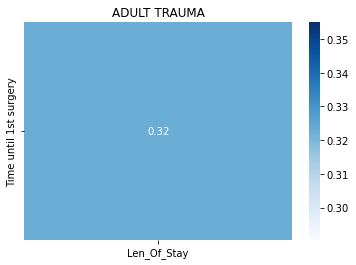



FEET
Days_between_admission_and_1st_surgery    0.571334
Name: Len_Of_Stay, dtype: float64


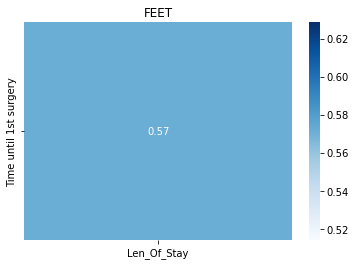



SHOULDER
Days_between_admission_and_1st_surgery    0.56117
Name: Len_Of_Stay, dtype: float64


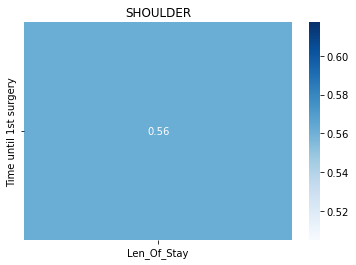



ELDERLY TRAUMA
Days_between_admission_and_1st_surgery    0.384051
Name: Len_Of_Stay, dtype: float64


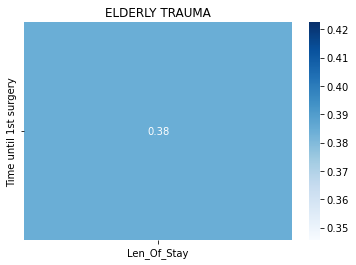



SKULL-MAXILLO-FACIAL
Days_between_admission_and_1st_surgery    0.652646
Name: Len_Of_Stay, dtype: float64


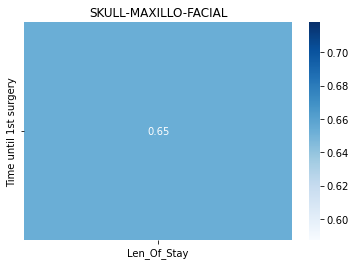



PEDIATRIC
Days_between_admission_and_1st_surgery    0.587601
Name: Len_Of_Stay, dtype: float64


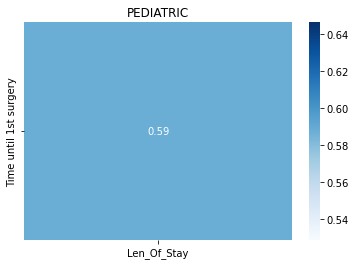



KNEE
Days_between_admission_and_1st_surgery    0.446188
Name: Len_Of_Stay, dtype: float64


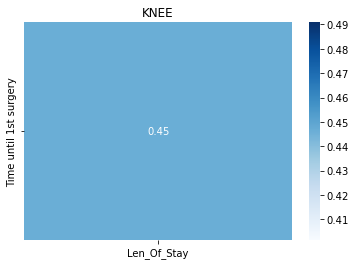



MICROSURGERY
Days_between_admission_and_1st_surgery    0.512114
Name: Len_Of_Stay, dtype: float64


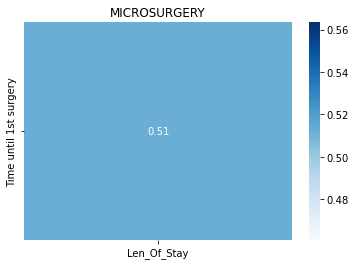



ONCOLOGY
Days_between_admission_and_1st_surgery    0.577771
Name: Len_Of_Stay, dtype: float64


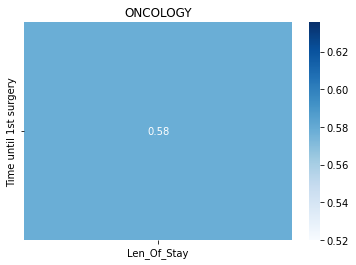



LIMB LENGTHENING
Days_between_admission_and_1st_surgery    0.472159
Name: Len_Of_Stay, dtype: float64


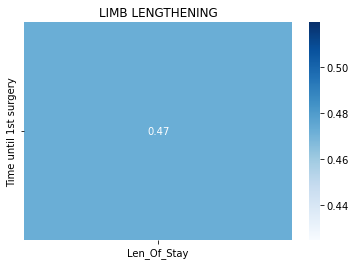



HAND
Days_between_admission_and_1st_surgery    0.595281
Name: Len_Of_Stay, dtype: float64


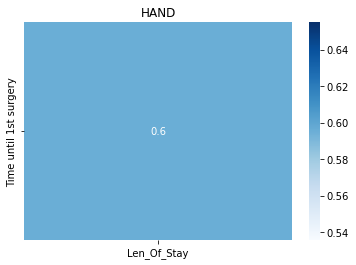



INTERNAL MEDICINE
Days_between_admission_and_1st_surgery    0.510214
Name: Len_Of_Stay, dtype: float64


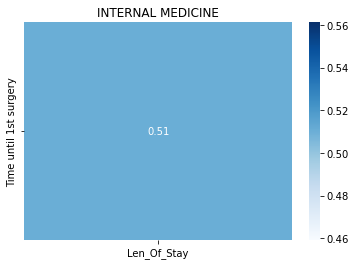



TRAUMA
Days_between_admission_and_1st_surgery    0.35711
Name: Len_Of_Stay, dtype: float64


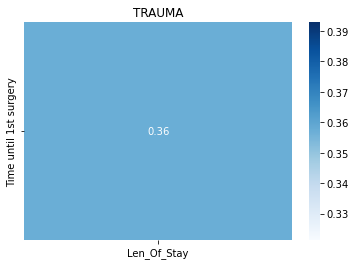



SPORT TRAUMA
Days_between_admission_and_1st_surgery    0.78919
Name: Len_Of_Stay, dtype: float64


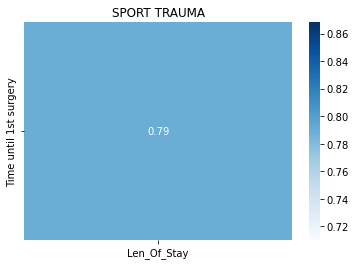

KeyError: 'Len_Of_Stay'

In [104]:
tem=pd.DataFrame()
for i in my_df['SERVICE'].unique():
    if i!='GENERAL SURGERY' and i!='THORACIC DEFORMITY':
        a=my_df[my_df['SERVICE']==i]
        print(i)  
        print(a.corr()['Len_Of_Stay'].iloc[[6]])
        corr=a.corr().iloc[[6]][['Len_Of_Stay']]
        #plt.figure(figsize = (10,10))
        ax=sns.heatmap(a.corr().iloc[[6]]['Len_Of_Stay'][:, np.newaxis],cmap="Blues",annot=True,yticklabels=['Time until 1st surgery'],xticklabels=['Len_Of_Stay'])
        ax.set_title(i)
        plt.savefig(i+'.jpg')
        plt.show()
        print('\n')
        corr['ser']=i
        tem=tem.append(corr)
        

tem=tem.loc['Len_Of_Stay']

In [ ]:
tem

In [ ]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
a=tem.sort_values(by=['Len_Of_Stay'],ascending=False)
a['Len_Of_Stay']=round(a['Len_Of_Stay'],2)
ax=sns.barplot(x = 'ser',
            y='Len_Of_Stay',
            data = a,
           ci=0)
for i in ax.containers:
        ax.bar_label(i,)
plt.show()

##### Question 6

In [ ]:
my_df['ADMISSION.DATE']= pd.to_datetime(my_df['ADMISSION.DATE'],format="%d/%m/%Y %H:%M")

In [ ]:
my_df.groupby(my_df['ADMISSION.DATE'].dt.strftime('%B'))['ADMISSION.DATE'].count().sort_values()

In [ ]:
my_df.groupby(my_df['ADMISSION.DATE'].dt.strftime('%B'))['HOSPITALIZATION.TYPE'].count().sort_values()

In [ ]:
my_df.head()

In [ ]:
my_df.groupby(my_df['HOSPITALIZATION.TYPE'])['MEDICAL.RECORD'].count().sort_values()

In [105]:
my_df.groupby(my_df['ADMISSION.DATE'].dt.strftime('%B'))

AttributeError: Can only use .dt accessor with datetimelike values

In [106]:
my_df.groupby(my_df['HOSPITALIZATION.TYPE'])['Len_Of_Stay'].sum().sort_values()

HOSPITALIZATION.TYPE
HOME SERVICE                                        1
INACTIVE INFRAT./LUX UP TO 3 SEM.TRANSFHOSP         4
INACTIVE - DAY HOSPITAL                            18
INACTIVE -FRAT./LUX UP TO 3 WEEKS. DEM ESP         35
INACTIVE - TREAT COUNT. - INTERCURRENCE            64
INACTIVE - TRANSFER ANOTHER HOSPITAL              667
INACTIVE - ORTHOPEDIC                             757
CONTINUITY OF TREATMENT. - REMOVAL OF MAT.        793
CNRAC                                            3005
JUDICIAL ORDER                                   3221
INACTIVE CONTINUITY OF TREATMENT - PDT           5924
INACTIVE - CNRAC - TFD                           9421
CLINICAL EMERGENCY                              10455
INACTIVE - MUNICIPALITY REGULATION - NIR        15888
CONTINUITY OF TREATMENT - CNRAC                 15996
URGENCY                                         57988
STATE REGULATION - NIR                          97118
INFECTION / POSTOPERATIVE COMPLICATION I        98491
SURGICA

In [107]:
my_df["month"] = my_df["ADMISSION.DATE"].dt.strftime('%m')
mydf_6 = my_df.groupby(["month", "SERVICE"]).count().sort_values('month')
mydf_6

AttributeError: Can only use .dt accessor with datetimelike values

In [108]:
mydf_6 = my_df.groupby(["month", "HOSPITALIZATION.TYPE"]).count().sort_values('month')

KeyError: 'month'

NameError: name 'mydf_6' is not defined

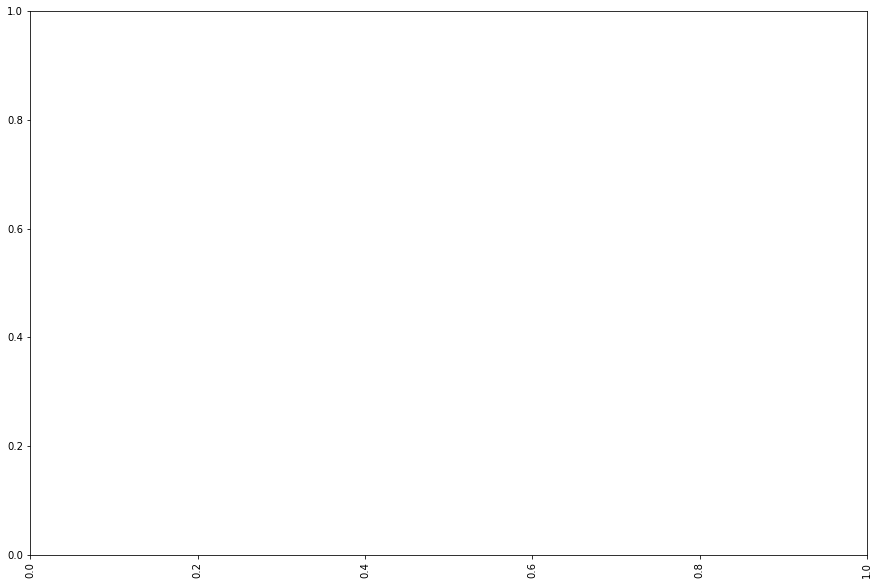

In [109]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
sns.barplot(x = 'SERVICE',
            y='Len_Of_Stay',
            data = mydf_6.groupby(['SERVICE'])['Len_Of_Stay'].mean().to_frame().reset_index().sort_values(by=['Len_Of_Stay'],ascending=False),
           ci=0)